In [290]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import scipy.stats as stats
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import classification_report
import random
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, roc_auc_score
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import log_loss


In [3]:
#Load data
gh_raw_data=[]
gh_raw_data = pd.read_csv('GroupedDataONS/GH_DT_TM_NSsecTowerHamlets and RichmondUpon Thames2023-12-02T14_16_01Z.csv')

In [6]:
gh_raw_data.head(5)

,Lower tier local authorities Code,Lower tier local authorities,General health (3 categories) Code,General health (3 categories),Method used to travel to workplace (12 categories) Code,Method used to travel to workplace (12 categories),National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code,National Statistics Socio-economic Classification (NS-SeC) (10 categories),Hours worked (3 categories) Code,Hours worked (3 categories),Observation
0,E09000027,Richmond upon Thames,-8,Does not apply,1,Work mainly at or from home,-8,Does not apply,-8,Does not apply,0
1,E09000027,Richmond upon Thames,-8,Does not apply,1,Work mainly at or from home,-8,Does not apply,1,Part-time: 30 hours or less worked,0
2,E09000027,Richmond upon Thames,-8,Does not apply,1,Work mainly at or from home,-8,Does not apply,2,Full-time: 31 or more hours worked,0
3,E09000027,Richmond upon Thames,-8,Does not apply,1,Work mainly at or from home,1,"L1, L2 and L3: Higher managerial, administrati...",-8,Does not apply,0
4,E09000027,Richmond upon Thames,-8,Does not apply,1,Work mainly at or from home,1,"L1, L2 and L3: Higher managerial, administrati...",1,Part-time: 30 hours or less worked,0
5,E09000027,Richmond upon Thames,-8,Does not apply,1,Work mainly at or from home,1,"L1, L2 and L3: Higher managerial, administrati...",2,Full-time: 31 or more hours worked,0
6,E09000027,Richmond upon Thames,-8,Does not apply,1,Work mainly at or from home,2,"L4, L5 and L6: Lower managerial, administrativ...",-8,Does not apply,0
7,E09000027,Richmond upon Thames,-8,Does not apply,1,Work mainly at or from home,2,"L4, L5 and L6: Lower managerial, administrativ...",1,Part-time: 30 hours or less worked,0
8,E09000027,Richmond upon Thames,-8,Does not apply,1,Work mainly at or from home,2,"L4, L5 and L6: Lower managerial, administrativ...",2,Full-time: 31 or more hours worked,0
9,E09000027,Richmond upon Thames,-8,Does not apply,1,Work mainly at or from home,3,L7: Intermediate occupations,-8,Does not apply,0


In [4]:
#Check how many records are there with does not apply in general health
gh_na = gh_raw_data[gh_raw_data['General health (3 categories)'] == 'Does not apply']
gh_na_valid = gh_na[gh_na['Observation'] != 0]
print("Number of records with General Health = Does not apply",len(gh_na))
print("Number of records with non zero Observations for above case",len(gh_na_valid))

Number of records with General Health = Does not apply 720
Number of records with non zero Observations for above case 0


In [5]:
# Remove the records with general health does not apply as there are no values for these in Observation column
gh_raw_data_v1=[]
gh_raw_data_v1 = gh_raw_data[gh_raw_data['General health (3 categories)'] != 'Does not apply']

In [6]:
len(gh_raw_data_v1)

1440

In [7]:
#Check how many records are there with does not apply in Hours worked
hw_na = gh_raw_data_v1[gh_raw_data_v1['Hours worked (3 categories)'] == 'Does not apply']
hw_na_valid = hw_na[hw_na['Observation'] != 0]
print("Number of records with General Health = Does not apply",len(hw_na))
print("Number of records with non zero Observations for above case",len(hw_na_valid))

Number of records with General Health = Does not apply 480
Number of records with non zero Observations for above case 40


In [8]:
# Remove the records with Hours worked= does not apply
gh_raw_data_v2=[]
gh_raw_data_v2 = gh_raw_data_v1[gh_raw_data_v1['Hours worked (3 categories)'] != 'Does not apply']

#Append the 40 records with non zero Observation
gh_raw_data_v2 = gh_raw_data_v2.append(hw_na_valid, ignore_index=True)

C:\Users\91956\AppData\Local\Temp\ipykernel_17264\4021853010.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gh_raw_data_v2 = gh_raw_data_v2.append(hw_na_valid, ignore_index=True)


In [9]:
len(gh_raw_data_v2)

1000

In [10]:
#Check how many records are there with does not apply in NS Sec
ns_na = gh_raw_data_v2[gh_raw_data_v2['National Statistics Socio-economic Classification (NS-SeC) (10 categories)'] == 'Does not apply']
ns_na_valid = ns_na[ns_na['Observation'] != 0]
print("Number of records with General Health = Does not apply",len(ns_na))
print("Number of records with non zero Observations for above case",len(ns_na_valid))

Number of records with General Health = Does not apply 100
Number of records with non zero Observations for above case 4


In [11]:
# Remove the records with NS Sec= does not apply
gh_raw_data_v3=[]
gh_raw_data_v3 = gh_raw_data_v2[gh_raw_data_v2['National Statistics Socio-economic Classification (NS-SeC) (10 categories)'] != 'Does not apply']

#Append the 40 records with non zero Observation
gh_raw_data_v3 = gh_raw_data_v3.append(ns_na_valid, ignore_index=True)

C:\Users\91956\AppData\Local\Temp\ipykernel_17264\1553382154.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gh_raw_data_v3 = gh_raw_data_v3.append(ns_na_valid, ignore_index=True)


In [12]:
len(gh_raw_data_v3)

904

In [13]:
# Remove the records with Observation =0
gh_raw_data_v4=[]
gh_raw_data_v4 = gh_raw_data_v3[gh_raw_data_v3['Observation'] != 0]


In [14]:
len(gh_raw_data_v4)

729

In [14]:
gh_raw_data_v4.head(5)

,Lower tier local authorities Code,Lower tier local authorities,General health (3 categories) Code,General health (3 categories),Method used to travel to workplace (12 categories) Code,Method used to travel to workplace (12 categories),National Statistics Socio-economic Classification (NS-SeC) (10 categories) Code,National Statistics Socio-economic Classification (NS-SeC) (10 categories),Hours worked (3 categories) Code,Hours worked (3 categories),Observation
0,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,1,"L1, L2 and L3: Higher managerial, administrati...",1,Part-time: 30 hours or less worked,3136
1,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,1,"L1, L2 and L3: Higher managerial, administrati...",2,Full-time: 31 or more hours worked,22464
2,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,2,"L4, L5 and L6: Lower managerial, administrativ...",1,Part-time: 30 hours or less worked,3598
3,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,2,"L4, L5 and L6: Lower managerial, administrativ...",2,Full-time: 31 or more hours worked,12708
4,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,3,L7: Intermediate occupations,1,Part-time: 30 hours or less worked,1222


In [15]:
# Get unique combinations of values in code and description using groupby
unique_combinations_grouped = gh_raw_data_v4.groupby(['Hours worked (3 categories) Code','Hours worked (3 categories)']).size().reset_index(name='Count')

print("Unique Combinations using groupby:")
print(unique_combinations_grouped[['Hours worked (3 categories) Code','Hours worked (3 categories)']])

Unique Combinations using groupby:
   Hours worked (3 categories) Code         Hours worked (3 categories)
0                                -8                      Does not apply
1                                 1  Part-time: 30 hours or less worked
2                                 2  Full-time: 31 or more hours worked


In [17]:
# Rename columns
gh_clean_data=[]
gh_clean_data = gh_raw_data_v4

new_column_names=list()
new_column_names=[
'la_code'
,'la_name'
,'gh_cat'
,'gh_desc'
,'trvlmode_cat'
,'trvlmode_desc'
,'nssec_cat'
,'nssec_desc'
,'hrs_wrkd_cat'
,'hrs_wrkd_desc'
,'resp_count'
]
column_mapping = dict(zip(gh_raw_data_v4.columns, new_column_names))
gh_clean_data.rename(columns=column_mapping, inplace=True)

C:\Users\91956\AppData\Local\Temp\ipykernel_17264\2765561210.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gh_clean_data.rename(columns=column_mapping, inplace=True)


In [18]:
gh_clean_data.resp_count.sum()

505571

# EDA -Begin

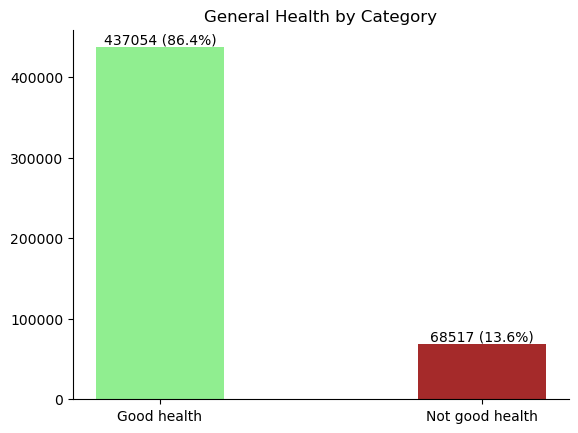

In [19]:
#EDA Start
# Aggregate resp_count by gh_cat
gh_agg=[]
gh_agg = gh_clean_data.groupby('gh_desc')['resp_count'].sum().reset_index()
# Calculate percentage
total_responses = sum(gh_agg['resp_count'])
percentage = [(count / total_responses) * 100 for count in gh_agg['resp_count']]

# Create a bar plot
fig, ax = plt.subplots()
bar_color = ['lightgreen', 'brown']
bars = ax.bar(gh_agg['gh_desc'], gh_agg['resp_count'], width=0.4, color=bar_color)
ax.set_title("General Health by Category")

# Add resp_count and percentage on top of the bars
for bar, count, percent in zip(bars, gh_agg['resp_count'], percentage):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{count} ({percent:.1f}%)", ha='center', va='bottom')

ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Display the plot
plt.show()


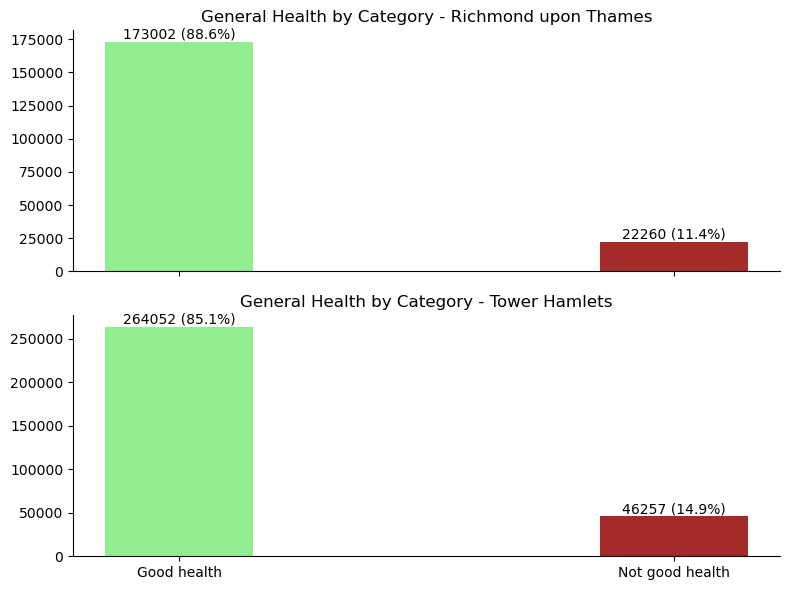

In [20]:
# EDA - Aggregate resp_count by gh_cat and local_authority
gh_agg = gh_clean_data.groupby(['la_name', 'gh_desc'])['resp_count'].sum().reset_index()

# Calculate percentage
gh_agg['percentage'] = (gh_agg['resp_count'] / gh_agg.groupby('la_name')['resp_count'].transform('sum')) * 100

# Create subplots for each local authority
fig, axs = plt.subplots(len(gh_agg['la_name'].unique()), 1, figsize=(8, 6), sharex=True)

# Iterate over each local authority
for i, (local_authority, data) in enumerate(gh_agg.groupby('la_name')):
    # Create a bar plot for each local authority
    ax = axs[i]
    
    # Create a bar plot
    bar_color = ['lightgreen', 'brown']
    bars = ax.bar(data['gh_desc'], data['resp_count'], width=0.3, color=bar_color)
    ax.set_title(f"General Health by Category - {local_authority}")

    # Add resp_count and percentage on top of the bars
    for bar, count, percent in zip(bars, data['resp_count'], data['percentage']):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{count} ({percent:.1f}%)", ha='center', va='bottom')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
   
# Display the plot
plt.tight_layout()
plt.show()


In [302]:
# Summary counts of Hours worked
#gh_agg_cnt = gh_clean_data.groupby(['hrs_wrkd_desc'])['resp_count'].sum().reset_index()
#gh_agg_cnt=gh_agg_cnt[gh_agg_cnt['hrs_wrkd_desc']!='Does not apply']
#gh_agg_cnt['percentage']= round((gh_agg_cnt['resp_count'] / gh_agg_cnt['resp_count'].sum()) * 100,2)
#gh_agg_cnt
# Copy the DataFrame to the clipboard
#gh_agg_cnt.to_clipboard(index=False, sep='\t')

In [21]:
# Summary table for Hours worked

hw_cnt = gh_clean_data.groupby(['la_name','gh_desc','hrs_wrkd_desc'])['resp_count'].sum().reset_index()
#gh_agg_cnt = gh_clean_data.groupby(['hrs_wrkd_desc'])['resp_count'].sum().reset_index()
hw_cnt=hw_cnt[hw_cnt['hrs_wrkd_desc']!='Does not apply']
hw_cnt_rpt=hw_cnt.groupby(['hrs_wrkd_desc'])['resp_count'].sum().reset_index()
hw_cnt_rpt['Percentage']= round((hw_cnt_rpt['resp_count'] / hw_cnt_rpt['resp_count'].sum()) * 100,2)
hw_cnt_rpt['Good Health'] = (hw_cnt[hw_cnt['gh_desc'] == 'Good health'].groupby(['hrs_wrkd_desc'])['resp_count'].sum().reset_index()['resp_count'])
hw_cnt_rpt['Not Good Health'] = (hw_cnt[hw_cnt['gh_desc'] == 'Not good health'].groupby(['hrs_wrkd_desc'])['resp_count'].sum().reset_index()['resp_count'])
hw_cnt_rpt.to_clipboard(index=False, sep='\t')

In [22]:
# Summary table for Travel Mode

#gh_tm_sum = gh_clean_data.groupby(['trvlmode_desc'])['resp_count'].sum().reset_index()
#gh_tm_sum=gh_tm_sum[gh_tm_sum['trvlmode_desc']!='Not in employment or aged 15 years and under']
#gh_tm_sum['percentage']= round((gh_tm_sum['resp_count'] / gh_tm_sum['resp_count'].sum()) * 100,2)
#gh_tm_sum = gh_tm_sum.sort_values(by='resp_count', ascending=False)
#gh_tm_sum.to_clipboard(index=False, sep='\t')

tm_cnt = gh_clean_data.groupby(['la_name','gh_desc','trvlmode_desc'])['resp_count'].sum().reset_index()
#gh_agg_cnt = gh_clean_data.groupby(['hrs_wrkd_desc'])['resp_count'].sum().reset_index()
tm_cnt=tm_cnt[tm_cnt['trvlmode_desc']!='Not in employment or aged 15 years and under']
#tm_cnt['resp_count'].sum()
tm_cnt_rpt=tm_cnt.groupby(['trvlmode_desc'])['resp_count'].sum().reset_index()
tm_cnt_rpt['Percentage']= round((tm_cnt_rpt['resp_count'] / tm_cnt_rpt['resp_count'].sum()) * 100,2)
tm_cnt_rpt['Good Health'] = (tm_cnt[tm_cnt['gh_desc'] == 'Good health'].groupby(['trvlmode_desc'])['resp_count'].sum().reset_index()['resp_count'])
tm_cnt_rpt['Not Good Health'] = (tm_cnt[tm_cnt['gh_desc'] == 'Not good health'].groupby(['trvlmode_desc'])['resp_count'].sum().reset_index()['resp_count'])
tm_cnt_rpt.sort_values(by='resp_count', ascending=False).to_clipboard(index=False, sep='\t')

In [23]:
#Replace the L1 L2 L3 kind of values from the nssec categories - Show only portions after :
colon = gh_clean_data['nssec_desc'].str.contains(':')
gh_clean_data['nssec_desc'] = (gh_clean_data['nssec_desc'].str.split(':').str[1].where(colon, gh_clean_data['nssec_desc']))

C:\Users\91956\AppData\Local\Temp\ipykernel_17264\1084239640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gh_clean_data['nssec_desc'] = (gh_clean_data['nssec_desc'].str.split(':').str[1].where(colon, gh_clean_data['nssec_desc']))


In [24]:
# Summary table for NSSec without removing trvlmode_desc'=='Not in employment or aged 15 years and under

ns_cnt = gh_clean_data.groupby(['la_name','gh_desc','trvlmode_desc','nssec_desc'])['resp_count'].sum().reset_index()
#gh_agg_cnt = gh_clean_data.groupby(['hrs_wrkd_desc'])['resp_count'].sum().reset_index()
ns_cnt=ns_cnt[ns_cnt['nssec_desc']!='Does not apply']
#abchj=ns_cnt[ns_cnt['trvlmode_desc']=='Not in employment or aged 15 years and under']
ns_cnt_rpt=ns_cnt.groupby(['nssec_desc'])['resp_count'].sum().reset_index()
ns_cnt_rpt['Percentage']= round((ns_cnt_rpt['resp_count'] / ns_cnt_rpt['resp_count'].sum()) * 100,2)
ns_cnt_rpt['Good Health'] = (ns_cnt[ns_cnt['gh_desc'] == 'Good health'].groupby(['nssec_desc'])['resp_count'].sum().reset_index()['resp_count'])
ns_cnt_rpt['Not Good Health'] = (ns_cnt[ns_cnt['gh_desc'] == 'Not good health'].groupby(['nssec_desc'])['resp_count'].sum().reset_index()['resp_count'])
ns_cnt_rpt.sort_values(by='resp_count', ascending=False).to_clipboard(index=False, sep='\t')

In [25]:
# Summary table for NSSec after removing trvlmode_desc'=='Not in employment or aged 15 years and under

ns_cnt = gh_clean_data.groupby(['la_name','gh_desc','trvlmode_desc','nssec_desc'])['resp_count'].sum().reset_index()
#gh_agg_cnt = gh_clean_data.groupby(['hrs_wrkd_desc'])['resp_count'].sum().reset_index()
ns_cnt=ns_cnt[ns_cnt['nssec_desc']!='Does not apply']
abck= ns_cnt[ns_cnt['nssec_desc']==' Never worked and long-term unemployed']
ns_cnt=ns_cnt[ns_cnt['trvlmode_desc']!='Not in employment or aged 15 years and under']
ns_cnt = ns_cnt.append(abck, ignore_index=True)
ns_cnt_rpt=ns_cnt.groupby(['nssec_desc'])['resp_count'].sum().reset_index()
ns_cnt_rpt['Percentage']= round((ns_cnt_rpt['resp_count'] / ns_cnt_rpt['resp_count'].sum()) * 100,2)
ns_cnt_rpt['Good Health'] = (ns_cnt[ns_cnt['gh_desc'] == 'Good health'].groupby(['nssec_desc'])['resp_count'].sum().reset_index()['resp_count'])
ns_cnt_rpt['Not Good Health'] = (ns_cnt[ns_cnt['gh_desc'] == 'Not good health'].groupby(['nssec_desc'])['resp_count'].sum().reset_index()['resp_count'])
ns_cnt_rpt.sort_values(by='resp_count', ascending=False).to_clipboard(index=False, sep='\t')


C:\Users\91956\AppData\Local\Temp\ipykernel_17264\4218954452.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ns_cnt = ns_cnt.append(abck, ignore_index=True)


In [26]:
#General Health by Hours Worked  - GH graph
gh_agg1 = gh_clean_data.groupby(['gh_desc','hrs_wrkd_desc'])['resp_count'].sum().reset_index()
gh_agg1=gh_agg1[gh_agg1['hrs_wrkd_desc']!='Does not apply']
#gh_agg1=gh_agg1[gh_agg1['gh_desc']!='Not good health']
gh_agg1['percentage']= round((gh_agg1['resp_count'] / gh_agg1['resp_count'].sum()) * 100,2)
gh_agg1

,gh_desc,hrs_wrkd_desc,resp_count,percentage
1,Good health,Full-time: 31 or more hours worked,175135,69.24
2,Good health,Part-time: 30 hours or less worked,58529,23.14
4,Not good health,Full-time: 31 or more hours worked,11116,4.39
5,Not good health,Part-time: 30 hours or less worked,8163,3.23


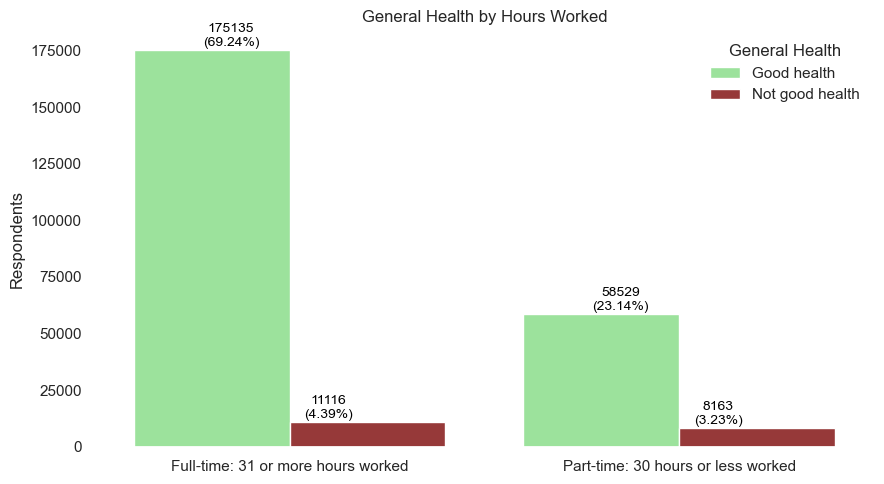

In [27]:
#General Health by Hours Worked
sns.set_theme()

# Create a grouped bar chart using seaborn
plt.figure(figsize=(9, 5))
ax=sns.barplot(x='hrs_wrkd_desc', y='resp_count', hue='gh_desc', data=gh_agg1,
            palette={'Good health': 'lightgreen', 'Not good health': 'brown'})

# Add data labels
#for index, value in enumerate(gh_agg1['resp_count']):
    #plt.text(index % len(gh_agg1['hrs_wrkd_desc'].unique()) - 0.15 + index // len(gh_agg1['hrs_wrkd_desc'].unique()) * 0.35,
           #  value + 500, f"{value}", ha='center', va='bottom', fontsize=8, color='black')


# Add data labels for resp_count and percentage
for index, (count, percent) in enumerate(zip(gh_agg1['resp_count'], gh_agg1['percentage'])):
    plt.text(index % len(gh_agg1['hrs_wrkd_desc'].unique()) - 0.15 + index // len(gh_agg1['hrs_wrkd_desc'].unique()) * 0.25,
             count + 500, f"{count}\n({percent:.2f}%)", ha='center', va='bottom', fontsize=10, color='black')

# Set labels and title
plt.xlabel('')
plt.ylabel('Respondents')
plt.title('General Health by Hours Worked')
ax.legend(title='General Health', frameon=False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [28]:
#Aggregating Richmond upon Thames data
gh_agg2 = gh_clean_data.groupby(['la_name','gh_desc','hrs_wrkd_desc'])['resp_count'].sum().reset_index()
gh_agg2=gh_agg2[gh_agg2['hrs_wrkd_desc']!='Does not apply']
gh_agg2=gh_agg2[gh_agg2['la_name']=='Richmond upon Thames']
#gh_agg2['percentage']= round((gh_agg1['resp_count'] / gh_agg1['resp_count'].sum()) * 100,2)
gh_agg2['percentage'] = round((gh_agg2['resp_count'] / gh_agg2.groupby('la_name')['resp_count'].transform('sum')) * 100,2)
gh_agg2

,la_name,gh_desc,hrs_wrkd_desc,resp_count,percentage
1,Richmond upon Thames,Good health,Full-time: 31 or more hours worked,67847,69.55
2,Richmond upon Thames,Good health,Part-time: 30 hours or less worked,23417,24.01
4,Richmond upon Thames,Not good health,Full-time: 31 or more hours worked,3839,3.94
5,Richmond upon Thames,Not good health,Part-time: 30 hours or less worked,2445,2.51


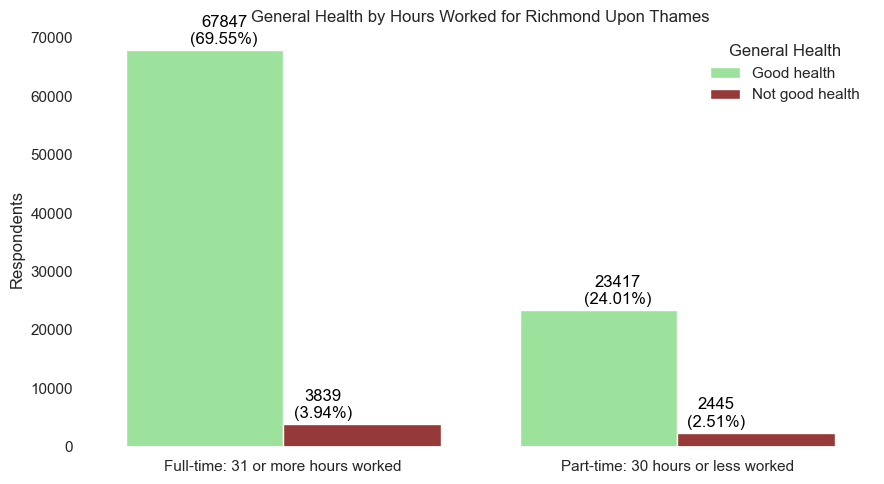

In [29]:
#General Health by Hours Worked for Richmond upon Thames
sns.set_theme()

# Create a grouped bar chart using seaborn
plt.figure(figsize=(9, 5))
ax=sns.barplot(x='hrs_wrkd_desc', y='resp_count', hue='gh_desc', data=gh_agg2,
            palette={'Good health': 'lightgreen', 'Not good health': 'brown'})

# Add data labels for resp_count and percentage
for index, (count, percent) in enumerate(zip(gh_agg2['resp_count'], gh_agg2['percentage'])):
    plt.text(index % len(gh_agg2['hrs_wrkd_desc'].unique()) - 0.15 + index // len(gh_agg2['hrs_wrkd_desc'].unique()) * 0.25,
             count + 500, f"{count}\n({percent:.2f}%)", ha='center', va='bottom', fontsize=12, color='black')

# Set labels and title
plt.xlabel('')
plt.ylabel('Respondents')
plt.title('General Health by Hours Worked for Richmond Upon Thames')
ax.legend(title='General Health', frameon=False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [30]:
#aggregating tower hamlets data
gh_agg3 = gh_clean_data.groupby(['la_name','gh_desc','hrs_wrkd_desc'])['resp_count'].sum().reset_index()
gh_agg3=gh_agg3[gh_agg3['hrs_wrkd_desc']!='Does not apply']
gh_agg3=gh_agg3[gh_agg3['la_name']=='Tower Hamlets']
#gh_agg2['percentage']= round((gh_agg1['resp_count'] / gh_agg1['resp_count'].sum()) * 100,2)
gh_agg3['percentage'] = round((gh_agg3['resp_count'] / gh_agg3.groupby('la_name')['resp_count'].transform('sum')) * 100,2)
gh_agg3

,la_name,gh_desc,hrs_wrkd_desc,resp_count,percentage
7,Tower Hamlets,Good health,Full-time: 31 or more hours worked,107288,69.04
8,Tower Hamlets,Good health,Part-time: 30 hours or less worked,35112,22.60
10,Tower Hamlets,Not good health,Full-time: 31 or more hours worked,7277,4.68
11,Tower Hamlets,Not good health,Part-time: 30 hours or less worked,5718,3.68


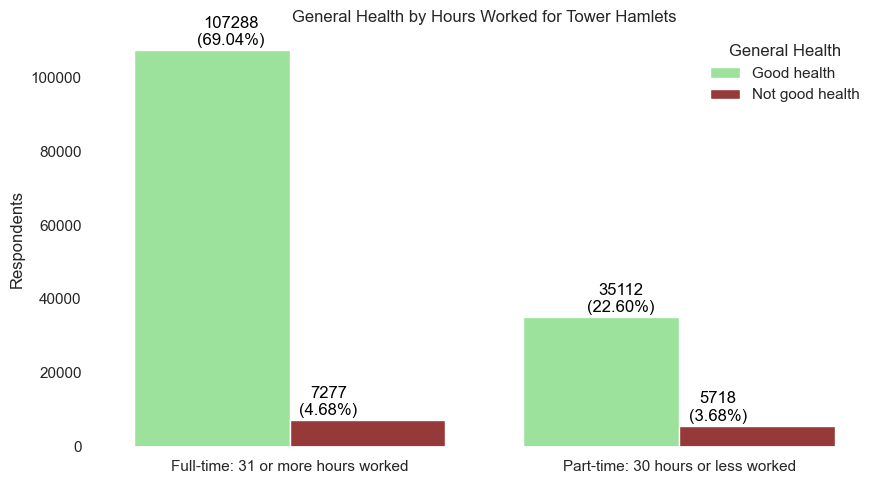

In [31]:
#General Health by Hours Worked for Tower Hamlets
sns.set_theme()

# Create a grouped bar chart using seaborn
plt.figure(figsize=(9, 5))
ax=sns.barplot(x='hrs_wrkd_desc', y='resp_count', hue='gh_desc', data=gh_agg3,
            palette={'Good health': 'lightgreen', 'Not good health': 'brown'})

# Add data labels for resp_count and percentage
for index, (count, percent) in enumerate(zip(gh_agg3['resp_count'], gh_agg3['percentage'])):
    plt.text(index % len(gh_agg3['hrs_wrkd_desc'].unique()) - 0.15 + index // len(gh_agg3['hrs_wrkd_desc'].unique()) * 0.25,
             count + 500, f"{count}\n({percent:.2f}%)", ha='center', va='bottom', fontsize=12, color='black')

# Set labels and title
plt.xlabel('')
plt.ylabel('Respondents')
plt.title('General Health by Hours Worked for Tower Hamlets')
ax.legend(title='General Health', frameon=False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [32]:
#General Health(Good Health) vs Travel Method  Out of good health the contribution of each travel mode'
gh_tm_agg = gh_clean_data.groupby(['gh_desc','trvlmode_desc'])['resp_count'].sum().reset_index()
gh_tm_agg=gh_tm_agg[gh_tm_agg['trvlmode_desc']!='Not in employment or aged 15 years and under']
gh_tm_agg=gh_tm_agg[gh_tm_agg['gh_desc']!='Not good health']
gh_tm_agg['percentage']= round((gh_tm_agg['resp_count'] / gh_tm_agg['resp_count'].sum()) * 100,2)
gh_tm_agg = gh_tm_agg.sort_values(by='resp_count', ascending=False)
gh_tm_agg

,gh_desc,trvlmode_desc,resp_count,percentage
11,Good health,Work mainly at or from home,127645,54.63
2,Good health,Driving a car or van,27962,11.97
10,Good health,"Underground, metro, light rail, tram",22396,9.58
5,Good health,On foot,17401,7.45
1,Good health,"Bus, minibus or coach",11080,4.74
0,Good health,Bicycle,10568,4.52
9,Good health,Train,10465,4.48
6,Good health,Other method of travel to work,2142,0.92
7,Good health,Passenger in a car or van,1649,0.71
3,Good health,"Motorcycle, scooter or moped",1323,0.57


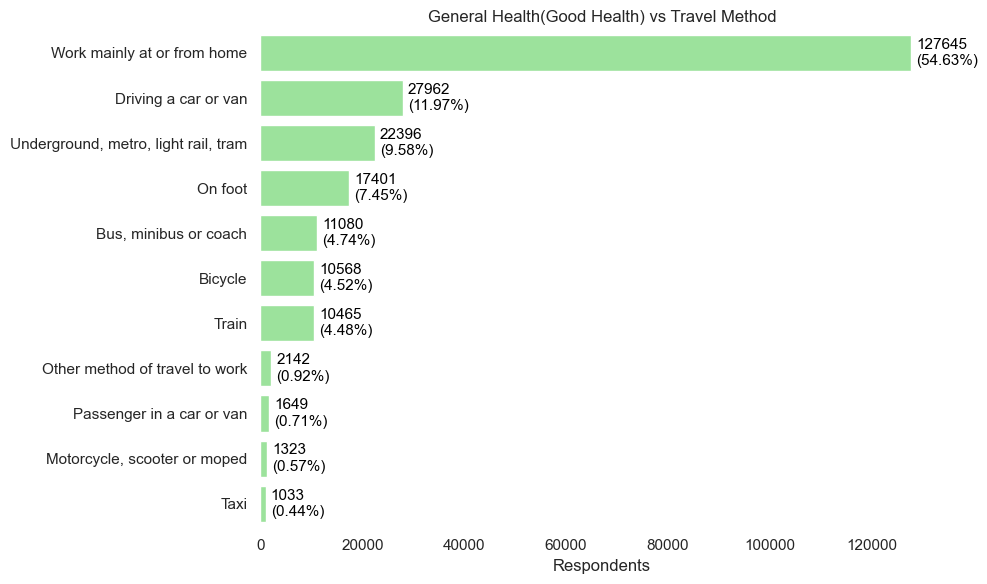

In [33]:
#General Health(Good Health) vs Travel Method'

# Set the seaborn style
sns.set_theme()

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='resp_count', y='trvlmode_desc', data=gh_tm_agg,
                 palette={'lightgreen'})  # Use a single color for 'Good health'

# Add data labels for resp_count and percentage
for index, (count, percent) in enumerate(zip(gh_tm_agg['resp_count'], gh_tm_agg['percentage'])):
    ax.text(count + 1000, index, f"{count}\n({percent:.2f}%)", ha='left', va='center', fontsize=11, color='black')

# Set labels and title
plt.xlabel('Respondents')
plt.ylabel('')
plt.title('General Health(Good Health) vs Travel Method')

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [34]:
#General Health(Not Good Health) vs Travel Method'
ngh_tm_agg = gh_clean_data.groupby(['gh_desc','trvlmode_desc'])['resp_count'].sum().reset_index()
ngh_tm_agg=ngh_tm_agg[ngh_tm_agg['trvlmode_desc']!='Not in employment or aged 15 years and under']
ngh_tm_agg=ngh_tm_agg[ngh_tm_agg['gh_desc']!='Good health']
ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
ngh_tm_agg = ngh_tm_agg.sort_values(by='resp_count', ascending=False)
ngh_tm_agg

,gh_desc,trvlmode_desc,resp_count,percentage
23,Not good health,Work mainly at or from home,7895,40.95
14,Not good health,Driving a car or van,3252,16.87
22,Not good health,"Underground, metro, light rail, tram",1950,10.11
17,Not good health,On foot,1888,9.79
13,Not good health,"Bus, minibus or coach",1864,9.67
21,Not good health,Train,961,4.98
12,Not good health,Bicycle,521,2.70
18,Not good health,Other method of travel to work,409,2.12
19,Not good health,Passenger in a car or van,293,1.52
20,Not good health,Taxi,136,0.71


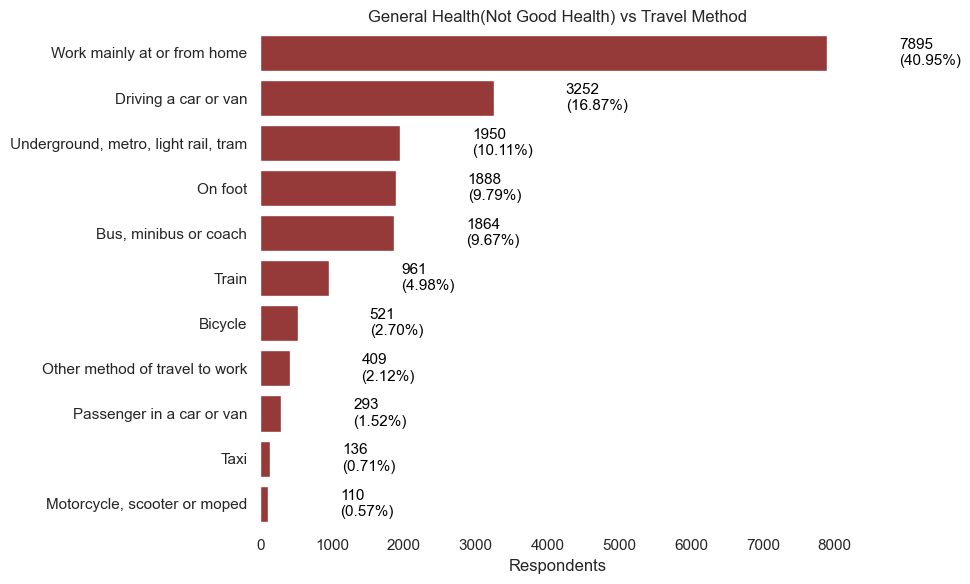

In [35]:
#General Health(Not Good Health) vs Travel Method'

# Set the seaborn style
sns.set_theme()

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='resp_count', y='trvlmode_desc', data=ngh_tm_agg,
                 palette={'brown'})  # Use a single color for 'Good health'

# Add data labels for resp_count and percentage
for index, (count, percent) in enumerate(zip(ngh_tm_agg['resp_count'], ngh_tm_agg['percentage'])):
    ax.text(count + 1000, index, f"{count}\n({percent:.2f}%)", ha='left', va='center', fontsize=11, color='black')

# Set labels and title
plt.xlabel('Respondents')
plt.ylabel('')
plt.title('General Health(Not Good Health) vs Travel Method')

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [36]:
#percentage of respondents in  good health for a particular travel method
gh_tm_agg = gh_clean_data.groupby(['gh_desc','trvlmode_desc'])['resp_count'].sum().reset_index()
gh_tm_agg=gh_tm_agg[gh_tm_agg['trvlmode_desc']!='Not in employment or aged 15 years and under']
#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
gh_tm_agg['percentage'] = round((gh_tm_agg['resp_count'] / gh_tm_agg.groupby('trvlmode_desc')['resp_count'].transform('sum')) * 100,2)
gh_tm_agg=gh_tm_agg[gh_tm_agg['gh_desc']!='Not good health']
gh_tm_agg = gh_tm_agg.sort_values(by='percentage', ascending=False)
gh_tm_agg

,gh_desc,trvlmode_desc,resp_count,percentage
0,Good health,Bicycle,10568,95.30
11,Good health,Work mainly at or from home,127645,94.18
3,Good health,"Motorcycle, scooter or moped",1323,92.32
10,Good health,"Underground, metro, light rail, tram",22396,91.99
9,Good health,Train,10465,91.59
5,Good health,On foot,17401,90.21
2,Good health,Driving a car or van,27962,89.58
8,Good health,Taxi,1033,88.37
1,Good health,"Bus, minibus or coach",11080,85.60
7,Good health,Passenger in a car or van,1649,84.91


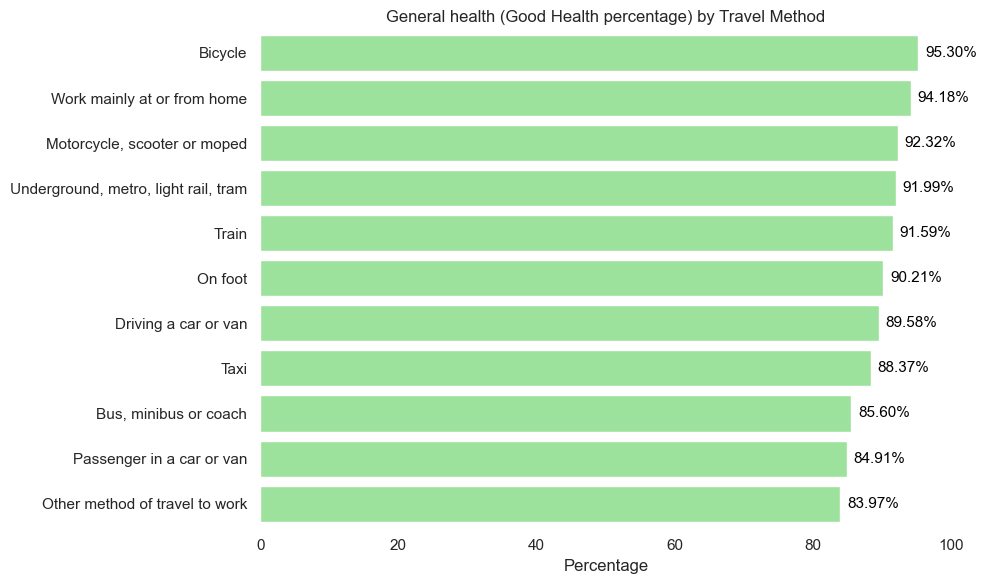

In [37]:
#Plot percentage of respondents with good health for a particular travel mode

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='percentage', y='trvlmode_desc', data=gh_tm_agg,
                 color='lightgreen')  # Use a single color for 'Good health'

# Add data labels for percentage
for index, percent in enumerate(gh_tm_agg['percentage']):
    ax.text(percent + 1, index, f"{percent:.2f}%", ha='left', va='center', fontsize=11, color='black')

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('')
plt.title('General health (Good Health percentage) by Travel Method')

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [38]:
#percentage of respondents in not good health for a particular travel method
ngh_tm_agg = gh_clean_data.groupby(['gh_desc','trvlmode_desc'])['resp_count'].sum().reset_index()
ngh_tm_agg=ngh_tm_agg[ngh_tm_agg['trvlmode_desc']!='Not in employment or aged 15 years and under']
#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
ngh_tm_agg['percentage'] = round((ngh_tm_agg['resp_count'] / ngh_tm_agg.groupby('trvlmode_desc')['resp_count'].transform('sum')) * 100,2)
ngh_tm_agg=ngh_tm_agg[ngh_tm_agg['gh_desc']!='Good health']
ngh_tm_agg = ngh_tm_agg.sort_values(by='percentage', ascending=False)
ngh_tm_agg

,gh_desc,trvlmode_desc,resp_count,percentage
18,Not good health,Other method of travel to work,409,16.03
19,Not good health,Passenger in a car or van,293,15.09
13,Not good health,"Bus, minibus or coach",1864,14.40
20,Not good health,Taxi,136,11.63
14,Not good health,Driving a car or van,3252,10.42
17,Not good health,On foot,1888,9.79
21,Not good health,Train,961,8.41
22,Not good health,"Underground, metro, light rail, tram",1950,8.01
15,Not good health,"Motorcycle, scooter or moped",110,7.68
23,Not good health,Work mainly at or from home,7895,5.82


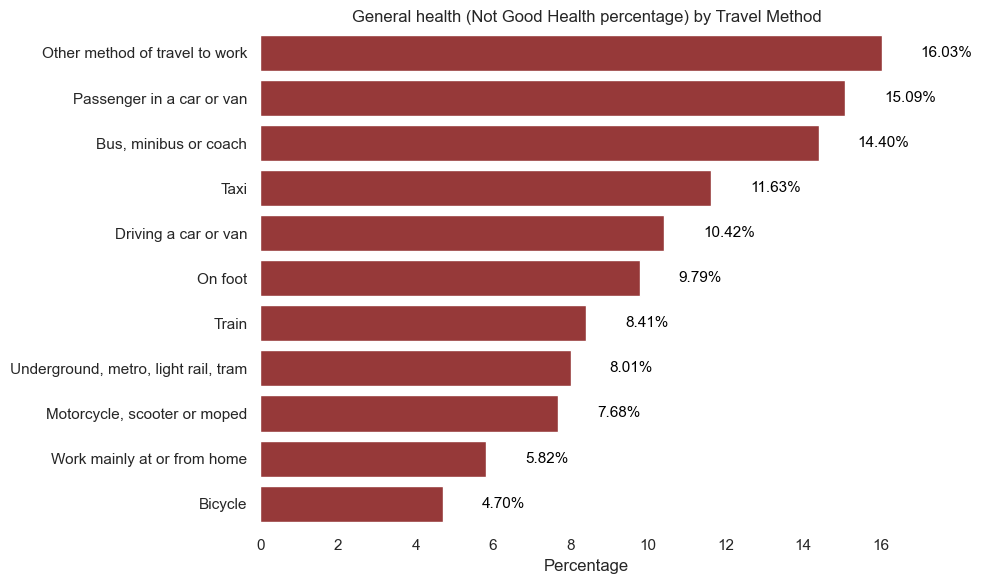

In [39]:
#Plot percentage of respondents with not good health for a particular travel mode

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='percentage', y='trvlmode_desc', data=ngh_tm_agg,
                 color='brown')  # Use a single color for 'Good health'

# Add data labels for percentage
for index, percent in enumerate(ngh_tm_agg['percentage']):
    ax.text(percent + 1, index, f"{percent:.2f}%", ha='left', va='center', fontsize=11, color='black')

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('')
plt.title('General health (Not Good Health percentage) by Travel Method')

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [574]:
#stacked bar chart
#percentage of respondents in  good health for a particular travel method
gh_tm_agg = gh_clean_data.groupby(['gh_desc','trvlmode_desc'])['resp_count'].sum().reset_index()
gh_tm_agg=gh_tm_agg[gh_tm_agg['trvlmode_desc']!='Not in employment or aged 15 years and under']
gh_tm_agg['percentage'] = round((gh_tm_agg['resp_count'] / gh_tm_agg.groupby('trvlmode_desc')['resp_count'].transform('sum')) * 100,2)
#gh_tm_agg=gh_tm_agg[gh_tm_agg['gh_desc']!='Not good health']
gh_tm_agg = gh_tm_agg.sort_values(by='percentage', ascending=False)
gh_tm_pivot = pd.pivot_table(gh_tm_agg, values='percentage', index='trvlmode_desc', columns='gh_desc', aggfunc='sum')
gh_tm_pivot

gh_desc,Good health,Not good health
trvlmode_desc,,
Bicycle,95.30,4.70
"Bus, minibus or coach",85.60,14.40
Driving a car or van,89.58,10.42
"Motorcycle, scooter or moped",92.32,7.68
On foot,90.21,9.79
Other method of travel to work,83.97,16.03
Passenger in a car or van,84.91,15.09
Taxi,88.37,11.63
Train,91.59,8.41


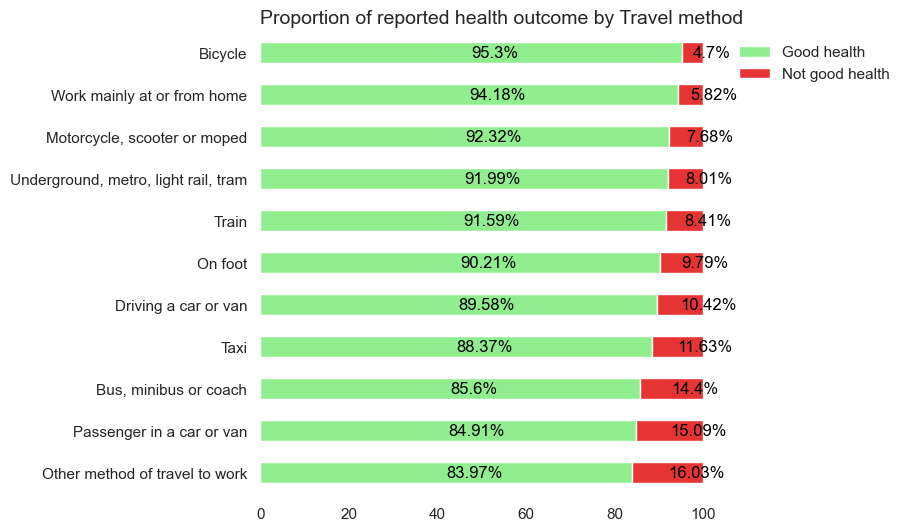

In [516]:
#Stacked chart
gh_tm_pivot_sorted = gh_tm_pivot.sort_values(by='Good health')
light_brown = (0.9, 0.2, 0.2)
ax=gh_tm_pivot_sorted.plot(kind='barh', 
                        stacked=True, 
                        color=['lightgreen',light_brown], 
                        figsize=(6, 6))
plt.legend(loc="lower left", ncol=2)
plt.ylabel("")
plt.xlabel("")
plt.title('Proportion of reported health outcome by Travel method',loc='left',fontsize=14)
ax.set_facecolor('none')
for n, x in enumerate([*gh_tm_pivot_sorted.index.values]):
    for (proportion, count, y_loc) in zip(gh_tm_pivot_sorted.loc[x],
                                          gh_tm_pivot_sorted.loc[x],
                                          gh_tm_pivot_sorted.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion)+ proportion/2,
                 y=n - 0.11,
                 s=f'{count}%', 
                 color="black",
                 fontsize=12
                 )
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0),frameon=False)
plt.show()

In [40]:
#percentage of respondents in  good health for a particular nssec including currently not working 155761
gh_ns_agg = gh_clean_data.groupby(['gh_desc','nssec_desc'])['resp_count'].sum().reset_index()
gh_ns_agg = gh_ns_agg[gh_ns_agg['nssec_desc']!='Does not apply']
gh_ns_agg['percentage'] = round((gh_ns_agg['resp_count'] / gh_ns_agg.groupby('nssec_desc')['resp_count'].transform('sum')) * 100,2)
gh_ns_agg=gh_ns_agg[gh_ns_agg['gh_desc']!='Not good health']
gh_ns_agg = gh_ns_agg.sort_values(by='percentage', ascending=False)
gh_ns_agg

,gh_desc,nssec_desc,resp_count,percentage
0,Good health,Full-time students,41264,93.55
1,Good health,"Higher managerial, administrative and profess...",89391,92.94
3,Good health,"Lower managerial, administrative and professi...",79372,89.45
8,Good health,Small employers and own account workers,29966,83.75
2,Good health,Intermediate occupations,28173,83.00
4,Good health,Lower supervisory and technical occupations,10074,78.29
7,Good health,Semi-routine occupations,21637,75.88
6,Good health,Routine occupations,18399,72.52
5,Good health,Never worked and long-term unemployed,24853,57.52


In [41]:
#percentage of respondents in  good health for a particular nssec without including currently not working 155761
gh_ns_agg = gh_clean_data.groupby(['gh_desc','trvlmode_desc','nssec_desc'])['resp_count'].sum().reset_index()
gh_ns_agg = gh_ns_agg[gh_ns_agg['nssec_desc']!='Does not apply']
abc= gh_ns_agg[gh_ns_agg['nssec_desc']==' Never worked and long-term unemployed']
gh_ns_agg=gh_ns_agg[gh_ns_agg['trvlmode_desc']!='Not in employment or aged 15 years and under']
gh_ns_agg = gh_ns_agg.append(abc, ignore_index=True)
gh_ns_agg = gh_ns_agg.groupby(['gh_desc','nssec_desc'])['resp_count'].sum().reset_index()
#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
gh_ns_agg['percentage'] = round((gh_ns_agg['resp_count'] / gh_ns_agg.groupby('nssec_desc')['resp_count'].transform('sum')) * 100,2)
gh_ns_agg=gh_ns_agg[gh_ns_agg['gh_desc']!='Not good health']
gh_ns_agg = gh_ns_agg.sort_values(by='percentage', ascending=False)
gh_ns_agg

C:\Users\91956\AppData\Local\Temp\ipykernel_17264\1498352378.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gh_ns_agg = gh_ns_agg.append(abc, ignore_index=True)


,gh_desc,nssec_desc,resp_count,percentage
1,Good health,"Higher managerial, administrative and profess...",79032,95.06
0,Good health,Full-time students,8190,94.33
3,Good health,"Lower managerial, administrative and professi...",66349,93.61
2,Good health,Intermediate occupations,20907,90.41
8,Good health,Small employers and own account workers,24091,90.10
4,Good health,Lower supervisory and technical occupations,7767,88.30
7,Good health,Semi-routine occupations,14772,86.58
6,Good health,Routine occupations,12556,86.47
5,Good health,Never worked and long-term unemployed,24853,57.52


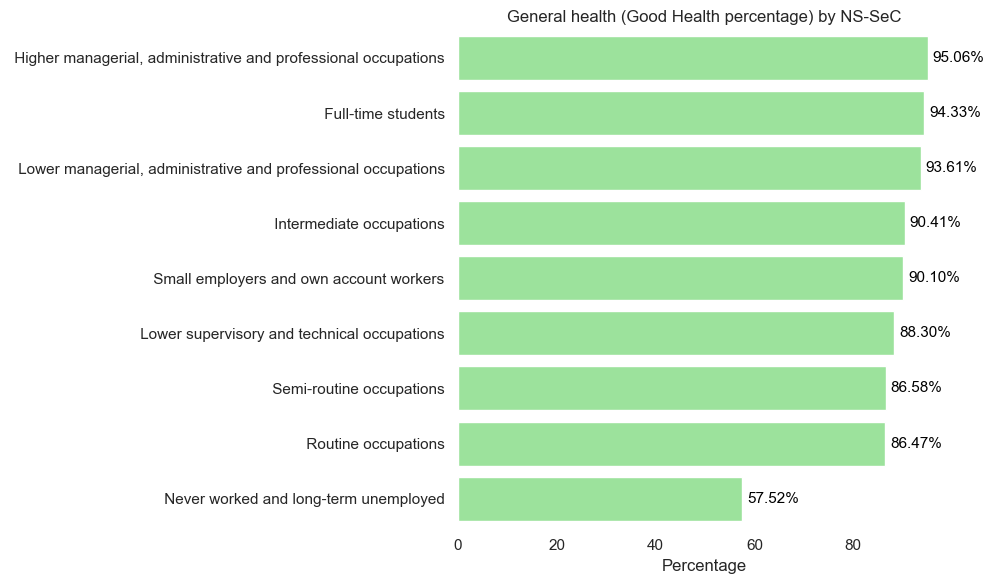

In [42]:
#Plot percentage of respondents with good health for a particular nssec

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='percentage', y='nssec_desc', data=gh_ns_agg,
                 color='lightgreen')  # Use a single color for 'Good health'

# Add data labels for percentage
for index, percent in enumerate(gh_ns_agg['percentage']):
    ax.text(percent + 1, index, f"{percent:.2f}%", ha='left', va='center', fontsize=11, color='black')

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('')
plt.title('General health (Good Health percentage) by NS-SeC')

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [43]:
#percentage of respondents in  not good health for a particular nssec including currently not working 155761
ngh_ns_agg = gh_clean_data.groupby(['gh_desc','nssec_desc'])['resp_count'].sum().reset_index()
ngh_ns_agg = ngh_ns_agg[ngh_ns_agg['nssec_desc']!='Does not apply']
#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
ngh_ns_agg['percentage'] = round((ngh_ns_agg['resp_count'] / ngh_ns_agg.groupby('nssec_desc')['resp_count'].transform('sum')) * 100,2)
ngh_ns_agg=ngh_ns_agg[ngh_ns_agg['gh_desc']!='Good health']
ngh_ns_agg = ngh_ns_agg.sort_values(by='percentage', ascending=False)
ngh_ns_agg

,gh_desc,nssec_desc,resp_count,percentage
15,Not good health,Never worked and long-term unemployed,18358,42.48
16,Not good health,Routine occupations,6973,27.48
17,Not good health,Semi-routine occupations,6877,24.12
14,Not good health,Lower supervisory and technical occupations,2793,21.71
12,Not good health,Intermediate occupations,5769,17.00
18,Not good health,Small employers and own account workers,5813,16.25
13,Not good health,"Lower managerial, administrative and professi...",9361,10.55
11,Not good health,"Higher managerial, administrative and profess...",6788,7.06
10,Not good health,Full-time students,2843,6.45


In [44]:
#percentage of respondents in  not good health for a particular nssec without including currently not working 155761
ngh_ns_agg = gh_clean_data.groupby(['gh_desc','trvlmode_desc','nssec_desc'])['resp_count'].sum().reset_index()
ngh_ns_agg = ngh_ns_agg[ngh_ns_agg['nssec_desc']!='Does not apply']
nabc= ngh_ns_agg[ngh_ns_agg['nssec_desc']==' Never worked and long-term unemployed']
ngh_ns_agg=ngh_ns_agg[ngh_ns_agg['trvlmode_desc']!='Not in employment or aged 15 years and under']
ngh_ns_agg = ngh_ns_agg.append(nabc, ignore_index=True)
ngh_ns_agg = ngh_ns_agg.groupby(['gh_desc','nssec_desc'])['resp_count'].sum().reset_index()
#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
ngh_ns_agg['percentage'] = round((ngh_ns_agg['resp_count'] / ngh_ns_agg.groupby('nssec_desc')['resp_count'].transform('sum')) * 100,2)
ngh_ns_agg=ngh_ns_agg[ngh_ns_agg['gh_desc']!='Good health']
ngh_ns_agg = ngh_ns_agg.sort_values(by='percentage', ascending=False)
ngh_ns_agg

C:\Users\91956\AppData\Local\Temp\ipykernel_17264\4141060922.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ngh_ns_agg = ngh_ns_agg.append(nabc, ignore_index=True)


,gh_desc,nssec_desc,resp_count,percentage
14,Not good health,Never worked and long-term unemployed,18358,42.48
15,Not good health,Routine occupations,1965,13.53
16,Not good health,Semi-routine occupations,2290,13.42
13,Not good health,Lower supervisory and technical occupations,1029,11.70
17,Not good health,Small employers and own account workers,2648,9.90
11,Not good health,Intermediate occupations,2217,9.59
12,Not good health,"Lower managerial, administrative and professi...",4527,6.39
9,Not good health,Full-time students,492,5.67
10,Not good health,"Higher managerial, administrative and profess...",4111,4.94


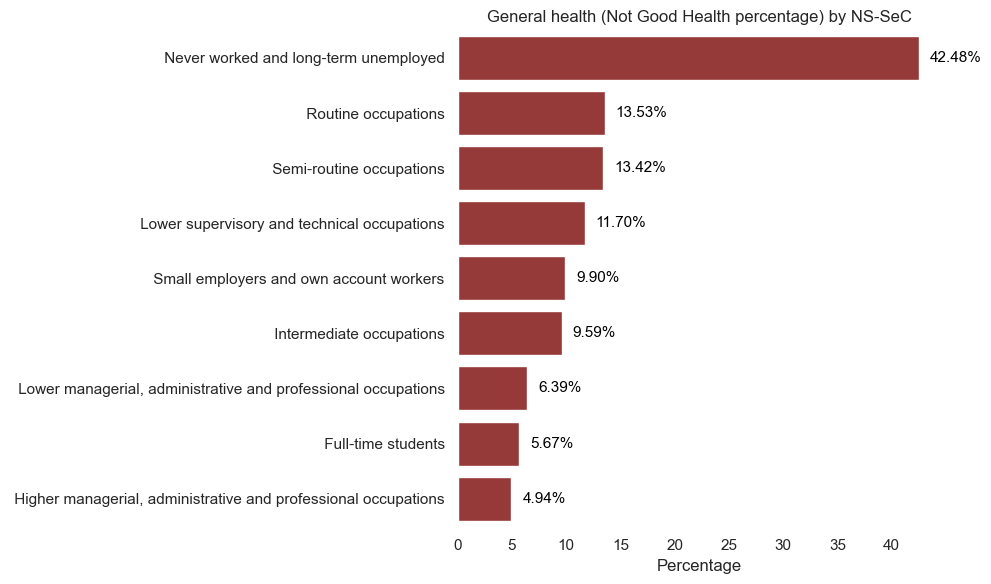

In [45]:
#Plot percentage of respondents with not good health for a particular nssec

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='percentage', y='nssec_desc', data=ngh_ns_agg,
                 color='brown')  # Use a single color for 'Good health'

# Add data labels for percentage
for index, percent in enumerate(ngh_ns_agg['percentage']):
    ax.text(percent + 1, index, f"{percent:.2f}%", ha='left', va='center', fontsize=11, color='black')

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('')
plt.title('General health (Not Good Health percentage) by NS-SeC')

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [482]:

#stacked bar chart
#percentage of respondents in  good health for a particular nssec without including currently not working 155761
gh_ns_agg = gh_clean_data.groupby(['gh_desc','trvlmode_desc','nssec_desc'])['resp_count'].sum().reset_index()
gh_ns_agg = gh_ns_agg[gh_ns_agg['nssec_desc']!='Does not apply']
abc= gh_ns_agg[gh_ns_agg['nssec_desc']==' Never worked and long-term unemployed']
gh_ns_agg=gh_ns_agg[gh_ns_agg['trvlmode_desc']!='Not in employment or aged 15 years and under']
gh_ns_agg = gh_ns_agg.append(abc, ignore_index=True)
gh_ns_agg = gh_ns_agg.groupby(['gh_desc','nssec_desc'])['resp_count'].sum().reset_index()
#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
gh_ns_agg['percentage'] = round((gh_ns_agg['resp_count'] / gh_ns_agg.groupby('nssec_desc')['resp_count'].transform('sum')) * 100,2)
#gh_ns_agg=gh_ns_agg[gh_ns_agg['gh_desc']!='Not good health']
gh_ns_agg = gh_ns_agg.sort_values(by='percentage', ascending=False)
gh_ns_pivot = pd.pivot_table(gh_ns_agg, values='percentage', index='nssec_desc', columns='gh_desc', aggfunc='sum')
gh_ns_pivot


gh_desc,Good health,Not good health
nssec_desc,,
Full-time students,94.33,5.67
"Higher managerial, administrative and professional occupations",95.06,4.94
Intermediate occupations,90.41,9.59
"Lower managerial, administrative and professional occupations",93.61,6.39
Lower supervisory and technical occupations,88.30,11.70
Never worked and long-term unemployed,57.52,42.48
Routine occupations,86.47,13.53
Semi-routine occupations,86.58,13.42
Small employers and own account workers,90.10,9.90


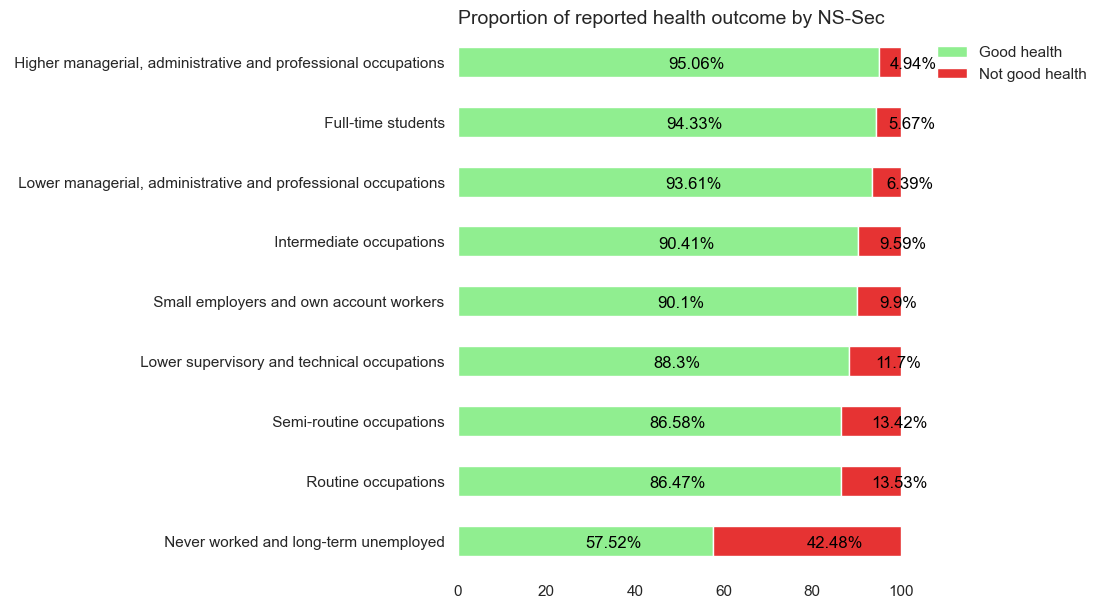

In [512]:
#Stacked chart

gh_ns_pivot_sorted = gh_ns_pivot.sort_values(by='Good health')
light_brown = (0.9, 0.2, 0.2)
ax=gh_ns_pivot_sorted.plot(kind='barh', 
                        stacked=True, 
                        color=['lightgreen',light_brown], 
                        figsize=(6, 7))

plt.legend(loc="lower left", ncol=2)
plt.ylabel("")
plt.xlabel("")
plt.title('Proportion of reported health outcome by NS-Sec',loc='left',fontsize=14)
ax.set_facecolor('none')
for n, x in enumerate([*gh_ns_pivot_sorted.index.values]):
    for (proportion, count, y_loc) in zip(gh_ns_pivot_sorted.loc[x],
                                          gh_ns_pivot_sorted.loc[x],
                                          gh_ns_pivot_sorted.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion)+ proportion/2,
                 y=n - 0.11,
                 s=f'{count}%', 
                 color="black",
                 fontsize=12
                 )
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0),frameon=False)

plt.show()

In [46]:
#percentage of respondents in  good health for a fulltime and part time
gh_hw_agg = gh_clean_data.groupby(['gh_desc','hrs_wrkd_desc'])['resp_count'].sum().reset_index()
gh_hw_agg = gh_hw_agg[gh_hw_agg['hrs_wrkd_desc']!='Does not apply']
#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
gh_hw_agg['percentage'] = round((gh_hw_agg['resp_count'] / gh_hw_agg.groupby('hrs_wrkd_desc')['resp_count'].transform('sum')) * 100,2)
gh_hw_agg=gh_hw_agg[gh_hw_agg['gh_desc']!='Not good health']
gh_hw_agg = gh_hw_agg.sort_values(by='percentage', ascending=False)
gh_hw_agg

,gh_desc,hrs_wrkd_desc,resp_count,percentage
1,Good health,Full-time: 31 or more hours worked,175135,94.03
2,Good health,Part-time: 30 hours or less worked,58529,87.76


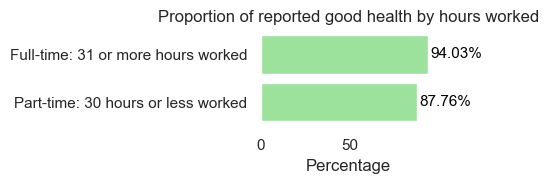

In [417]:
#Plot percentage of respondents with good health for a particular hrs wrkd

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(5, 2))
ax = sns.barplot(x='percentage', y='hrs_wrkd_desc', data=gh_hw_agg,
                 color='lightgreen')  # Use a single color for 'Good health'

# Add data labels for percentage
for index, percent in enumerate(gh_hw_agg['percentage']):
    ax.text(percent + 1, index, f"{percent:.2f}%", ha='left', va='center', fontsize=11, color='black')

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('')
#plt.title('General health (Good Health percentage) by Hours worked')
plt.title('Proportion of reported good health by hours worked')

#ax.set_title('Proportion of reported good health by hours worked', loc='left')
# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [48]:
#percentage of respondents in  good health for a fulltime and part time
ngh_hw_agg = gh_clean_data.groupby(['gh_desc','hrs_wrkd_desc'])['resp_count'].sum().reset_index()
ngh_hw_agg = ngh_hw_agg[ngh_hw_agg['hrs_wrkd_desc']!='Does not apply']
#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)

ngh_hw_agg['percentage'] = round((ngh_hw_agg['resp_count'] / ngh_hw_agg.groupby('hrs_wrkd_desc')['resp_count'].transform('sum')) * 100,2)
ngh_hw_agg=ngh_hw_agg[ngh_hw_agg['gh_desc']!='Good health']
ngh_hw_agg = ngh_hw_agg.sort_values(by='percentage', ascending=False)
ngh_hw_agg

,gh_desc,hrs_wrkd_desc,resp_count,percentage
5,Not good health,Part-time: 30 hours or less worked,8163,12.24
4,Not good health,Full-time: 31 or more hours worked,11116,5.97


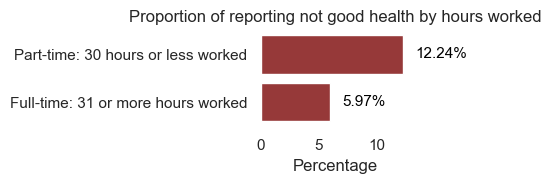

In [418]:
#Plot percentage of respondents with not good health for a particular hrs wrkd

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(5, 2))
ax = sns.barplot(x='percentage', y='hrs_wrkd_desc', data=ngh_hw_agg,
                 color='brown')  # Use a single color for 'Good health'

# Add data labels for percentage
for index, percent in enumerate(ngh_hw_agg['percentage']):
    ax.text(percent + 1, index, f"{percent:.2f}%", ha='left', va='center', fontsize=11, color='black')

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('')
#plt.title('General health (Not Good Health percentage) by Hours worked')

plt.title('Proportion of reporting not good health by hours worked')

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [475]:
#stacked bar chart
#percentage of respondents in  good health for a fulltime and part time
gh_hw_agg_st = gh_clean_data.groupby(['gh_desc','hrs_wrkd_desc'])['resp_count'].sum().reset_index()

gh_hw_agg_st = gh_hw_agg_st[gh_hw_agg_st['hrs_wrkd_desc']!='Does not apply']
gh_hw_agg_st['percentage'] = round((gh_hw_agg_st['resp_count'] / gh_hw_agg_st.groupby('hrs_wrkd_desc')['resp_count'].transform('sum')) * 100,2)
gh_hw_agg_st = gh_hw_agg_st.sort_values(by='percentage', ascending=False)
gh_hw_pivot = pd.pivot_table(gh_hw_agg_st, values='percentage', index='hrs_wrkd_desc', columns='gh_desc', aggfunc='sum')
gh_hw_pivot

#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
#gh_hw_agg_st['percentage'] = round((gh_hw_agg_st['resp_count'] / gh_hw_agg_st.groupby('hrs_wrkd_desc')['resp_count'].transform('sum')) * 100,2)
#gh_hw_agg_st=gh_hw_agg_st[gh_hw_agg_st['gh_desc']!='Not good health']
#gh_hw_agg_st = gh_hw_agg_st.sort_values(by='percentage', ascending=False)


#gh_hw_agg_ct

gh_desc,Good health,Not good health
hrs_wrkd_desc,,
Full-time: 31 or more hours worked,94.03,5.97
Part-time: 30 hours or less worked,87.76,12.24


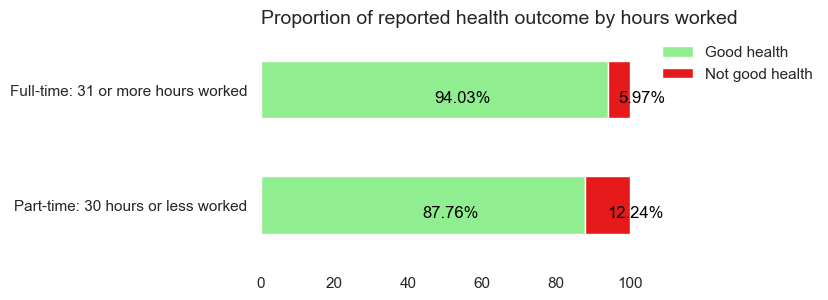

In [510]:
gh_hw_pivot_sorted = gh_hw_pivot.sort_values(by='Good health')
light_brown = (0.9, 0.2, 0.2)
#light_brown =(0.9, 0.25, 0.0) 
ax=gh_hw_pivot_sorted.plot(kind='barh', 
                        stacked=True, 
                        color=['lightgreen',light_brown], 
                        figsize=(5, 3))

plt.legend(loc="lower left", ncol=2)
plt.ylabel("")
plt.xlabel("")
plt.title('Proportion of reported health outcome by hours worked',loc='left',fontsize=14)
ax.set_facecolor('none')
ax.set_facecolor('none')
for n, x in enumerate([*gh_hw_pivot_sorted.index.values]):
    for (proportion, count, y_loc) in zip(gh_hw_pivot_sorted.loc[x],
                                          gh_hw_pivot_sorted.loc[x],
                                          gh_hw_pivot_sorted.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion)+ proportion/2,
                 y=n - 0.11,
                 s=f'{count}%', 
                 color="black",
                 fontsize=12
                 )
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0),frameon=False)

plt.show()

In [157]:
#percentage of respondents in  not good health for various combination of variables
ngh_comb_agg = gh_clean_data
ngh_comb_agg['combination']=ngh_comb_agg['hrs_wrkd_desc'].str[:9] + ngh_comb_agg['nssec_desc'].str[:14]+ ngh_comb_agg['trvlmode_desc'].str[:10]

#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
ncomb= ngh_comb_agg[ngh_comb_agg['nssec_desc']==' Never worked and long-term unemployed']
ngh_comb_agg = ngh_comb_agg[ngh_comb_agg['hrs_wrkd_desc']!='Does not apply']
ngh_comb_agg=ngh_comb_agg[ngh_comb_agg['trvlmode_desc']!='Not in employment or aged 15 years and under']
ngh_comb_agg = ngh_comb_agg.append(ncomb, ignore_index=True)
ngh_comb_agg = ngh_comb_agg.groupby(['gh_desc','combination'])['resp_count'].sum().reset_index()
ngh_comb_agg['percentage'] = round((ngh_comb_agg['resp_count'] / ngh_comb_agg.groupby('combination')['resp_count'].transform('sum')) * 100,2)
#ngh_comb_agg['percentage'] = round((ngh_comb_agg['resp_count'] / ngh_comb_agg['resp_count'].transform('sum')) * 100,2)
ngh_comb_agg=ngh_comb_agg[ngh_comb_agg['gh_desc']!='Good health']
ngh_comb_agg=ngh_comb_agg[ngh_comb_agg['resp_count']>100]
ngh_comb_agg = ngh_comb_agg.sort_values(by='percentage', ascending=False)
ngh_comb_agg_head=ngh_comb_agg.head(25)
ngh_comb_agg_head

,gh_desc,combination,resp_count,percentage
177,Not good health,Does not Never worked Not in emp,18358,42.48
311,Not good health,Part-time Lower superviDriving a,109,20.45
332,Not good health,"Part-time Semi-routine Bus, minib",387,19.11
321,Not good health,"Part-time Routine occupBus, minib",282,18.30
328,Not good health,Part-time Routine occupTrain,109,18.26
322,Not good health,Part-time Routine occupDriving a,212,18.24
324,Not good health,Part-time Routine occupOn foot,294,16.55
333,Not good health,Part-time Semi-routine Driving a,240,16.53
289,Not good health,"Part-time Intermediate Bus, minib",118,16.37
344,Not good health,Part-time Small employeDriving a,582,15.44


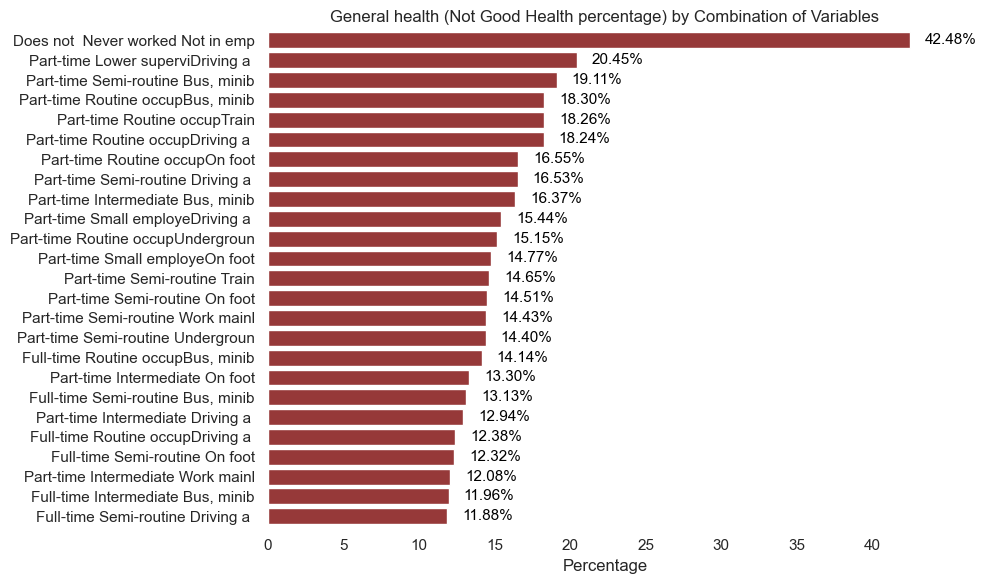

In [158]:
#Plot percentage of respondents with not good health for a particular hrs wrkd

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='percentage', y='combination', data=ngh_comb_agg_head,
                 color='brown')  # Use a single color for 'Good health'

# Add data labels for percentage
for index, percent in enumerate(ngh_comb_agg_head['percentage']):
    ax.text(percent + 1, index, f"{percent:.2f}%", ha='left', va='center', fontsize=11, color='black')

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('')
plt.title('General health (Not Good Health percentage) by Combination of Variables')

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [153]:
#percentage of respondents in  not good health for various combination of variables
gh_comb_agg = gh_clean_data
gh_comb_agg['combination']=gh_comb_agg['hrs_wrkd_desc'].str[:9] + gh_comb_agg['nssec_desc'].str[:14]+ gh_comb_agg['trvlmode_desc'].str[:10]

#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
ncomb1= gh_comb_agg[gh_comb_agg['nssec_desc']==' Never worked and long-term unemployed']
gh_comb_agg = gh_comb_agg[gh_comb_agg['hrs_wrkd_desc']!='Does not apply']
gh_comb_agg=gh_comb_agg[gh_comb_agg['trvlmode_desc']!='Not in employment or aged 15 years and under']
gh_comb_agg = gh_comb_agg.append(ncomb1, ignore_index=True)
gh_comb_agg = gh_comb_agg.groupby(['gh_desc','combination'])['resp_count'].sum().reset_index()
gh_comb_agg['percentage'] = round((gh_comb_agg['resp_count'] / gh_comb_agg.groupby('combination')['resp_count'].transform('sum')) * 100,2)
#ngh_comb_agg['percentage'] = round((ngh_comb_agg['resp_count'] / ngh_comb_agg['resp_count'].transform('sum')) * 100,2)
gh_comb_agg=gh_comb_agg[gh_comb_agg['gh_desc']!='Not good health']
gh_comb_agg=gh_comb_agg[gh_comb_agg['resp_count']>1000]
gh_comb_agg = gh_comb_agg.sort_values(by='percentage', ascending=False)
gh_comb_agg_head=gh_comb_agg.head(25)
gh_comb_agg_head

,gh_desc,combination,resp_count,percentage
12,Good health,Full-time Higher manageBicycle,2207,97.40
34,Good health,Full-time Lower managerBicycle,2802,97.39
16,Good health,Full-time Higher manageOn foot,2721,96.11
22,Good health,Full-time Higher manageWork mainl,57427,95.64
20,Good health,Full-time Higher manageTrain,1645,95.31
42,Good health,Full-time Lower managerTrain,2184,94.92
44,Good health,Full-time Lower managerWork mainl,32792,94.90
21,Good health,Full-time Higher manageUndergroun,3946,94.76
65,Good health,Full-time Routine occupUndergroun,1436,93.98
88,Good health,Full-time Small employeWork mainl,5401,93.90


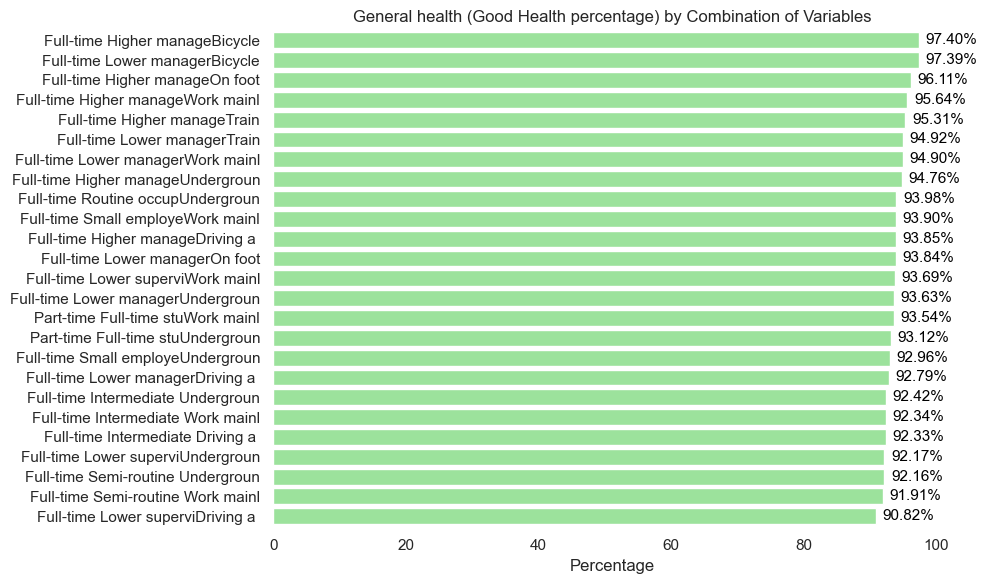

In [154]:
#Plot percentage of respondents with not good health for a particular hrs wrkd

# Create a horizontal bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='percentage', y='combination', data=gh_comb_agg_head,
                 color='lightgreen')  # Use a single color for 'Good health'

# Add data labels for percentage
for index, percent in enumerate(gh_comb_agg_head['percentage']):
    ax.text(percent + 1, index, f"{percent:.2f}%", ha='left', va='center', fontsize=11, color='black')

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('')
plt.title('General health (Good Health percentage) by Combination of Variables')

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [53]:
gh_comb_agg = gh_clean_data
gh_comb_agg['combination']=gh_comb_agg['hrs_wrkd_desc'].str[:9] + gh_comb_agg['nssec_desc'].str[:14]+ gh_comb_agg['trvlmode_desc'].str[:10]

#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
ncomb1= gh_comb_agg[gh_comb_agg['nssec_desc']==' Never worked and long-term unemployed']
gh_comb_agg = gh_comb_agg[gh_comb_agg['hrs_wrkd_desc']!='Does not apply']
gh_comb_agg=gh_comb_agg[gh_comb_agg['trvlmode_desc']!='Not in employment or aged 15 years and under']
#gh_comb_agg=gh_comb_agg[gh_comb_agg['resp_count']>1000]
gh_comb_agg = gh_comb_agg.append(ncomb1, ignore_index=True)
gh_comb_agg

C:\Users\91956\AppData\Local\Temp\ipykernel_17264\260055220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gh_comb_agg['combination']=gh_comb_agg['hrs_wrkd_desc'].str[:9] + gh_comb_agg['nssec_desc'].str[:14]+ gh_comb_agg['trvlmode_desc'].str[:10]
C:\Users\91956\AppData\Local\Temp\ipykernel_17264\260055220.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gh_comb_agg = gh_comb_agg.append(ncomb1, ignore_index=True)


,la_code,la_name,gh_cat,gh_desc,trvlmode_cat,trvlmode_desc,nssec_cat,nssec_desc,hrs_wrkd_cat,hrs_wrkd_desc,resp_count,combination
0,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,1,"Higher managerial, administrative and profess...",1,Part-time: 30 hours or less worked,3136,Part-time Higher manageWork mainl
1,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,1,"Higher managerial, administrative and profess...",2,Full-time: 31 or more hours worked,22464,Full-time Higher manageWork mainl
2,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,2,"Lower managerial, administrative and professi...",1,Part-time: 30 hours or less worked,3598,Part-time Lower managerWork mainl
3,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,2,"Lower managerial, administrative and professi...",2,Full-time: 31 or more hours worked,12708,Full-time Lower managerWork mainl
4,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,3,Intermediate occupations,1,Part-time: 30 hours or less worked,1222,Part-time Intermediate Work mainl
...,...,...,...,...,...,...,...,...,...,...,...,...
688,E09000030,Tower Hamlets,2,Not good health,11,Other method of travel to work,9,Full-time students,2,Full-time: 31 or more hours worked,1,Full-time Full-time stuOther meth
689,E09000027,Richmond upon Thames,1,Good health,12,Not in employment or aged 15 years and under,8,Never worked and long-term unemployed,-8,Does not apply,5528,Does not Never worked Not in emp
690,E09000027,Richmond upon Thames,2,Not good health,12,Not in employment or aged 15 years and under,8,Never worked and long-term unemployed,-8,Does not apply,3111,Does not Never worked Not in emp
691,E09000030,Tower Hamlets,1,Good health,12,Not in employment or aged 15 years and under,8,Never worked and long-term unemployed,-8,Does not apply,19325,Does not Never worked Not in emp


##EDA End -- pending -- create table for combinations

#Data Transformation Begin

In [54]:
# Keep only the respondents who are currently working and who belongs to the category of never worked - Total 296154

gh_clean_data_v2 = gh_clean_data

#ngh_tm_agg['percentage']= round((ngh_tm_agg['resp_count'] / ngh_tm_agg['resp_count'].sum()) * 100,2)
data_append= gh_clean_data_v2[gh_clean_data_v2['nssec_desc']==' Never worked and long-term unemployed']
gh_clean_data_v2 = gh_clean_data_v2[gh_clean_data_v2['hrs_wrkd_desc']!='Does not apply']
gh_cgh_clean_data_v2omb_agg=gh_clean_data_v2[gh_clean_data_v2['trvlmode_desc']!='Not in employment or aged 15 years and under']
gh_clean_data_v2 = gh_clean_data_v2.append(data_append, ignore_index=True)
gh_clean_data_v2['resp_count'].sum()

C:\Users\91956\AppData\Local\Temp\ipykernel_17264\276082208.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gh_clean_data_v2 = gh_clean_data_v2.append(data_append, ignore_index=True)


296154

In [55]:
#Select relevant columns for processing
selected_columns = [ 'hrs_wrkd_cat', 'trvlmode_cat', 'nssec_cat']
selected_data= gh_clean_data_v2[selected_columns]
selected_data

,hrs_wrkd_cat,trvlmode_cat,nssec_cat
0,1,1,1
1,2,1,1
2,1,1,2
3,2,1,2
4,1,1,3
...,...,...,...
688,2,11,9
689,-8,12,8
690,-8,12,8
691,-8,12,8


In [56]:
# Convert categorical variables to dummy variables
dummy_data = pd.get_dummies(selected_data, columns=[ 'hrs_wrkd_cat', 'trvlmode_cat', 'nssec_cat'])

dummy_data

,hrs_wrkd_cat_-8,hrs_wrkd_cat_1,hrs_wrkd_cat_2,trvlmode_cat_1,trvlmode_cat_2,trvlmode_cat_3,trvlmode_cat_4,trvlmode_cat_5,trvlmode_cat_6,trvlmode_cat_7,...,trvlmode_cat_12,nssec_cat_1,nssec_cat_2,nssec_cat_3,nssec_cat_4,nssec_cat_5,nssec_cat_6,nssec_cat_7,nssec_cat_8,nssec_cat_9
0,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
689,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
690,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
691,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [203]:
# Concatenate the dummy variables with the original DataFrame
gh_processed_data=[]
gh_processed_data = pd.concat([gh_clean_data_v2, dummy_data], axis=1)

# Drop the original categorical columns and 'resp_count' since it will be replaced
#df_processed = df_processed.drop(['gh_cat', 'hrs_wrkd_cat', 'trvlmode_cat', 'nssec_cat','gh_desc', 'hres_wrkd_desc', 'trvlmode_desc', 'nssec_desc' ], axis=1)

gh_processed_data = gh_processed_data.drop([ 'hrs_wrkd_cat', 'trvlmode_cat', 'nssec_cat', 'hrs_wrkd_desc', 'trvlmode_desc', 'nssec_desc' ], axis=1)


In [204]:
gh_processed_data

,la_code,la_name,gh_cat,gh_desc,resp_count,combination,hrs_wrkd_cat_-8,hrs_wrkd_cat_1,hrs_wrkd_cat_2,trvlmode_cat_1,...,trvlmode_cat_12,nssec_cat_1,nssec_cat_2,nssec_cat_3,nssec_cat_4,nssec_cat_5,nssec_cat_6,nssec_cat_7,nssec_cat_8,nssec_cat_9
0,E09000027,Richmond upon Thames,1,Good health,3136,Part-time Higher manageWork mainl,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,E09000027,Richmond upon Thames,1,Good health,22464,Full-time Higher manageWork mainl,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2,E09000027,Richmond upon Thames,1,Good health,3598,Part-time Lower managerWork mainl,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,E09000027,Richmond upon Thames,1,Good health,12708,Full-time Lower managerWork mainl,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,E09000027,Richmond upon Thames,1,Good health,1222,Part-time Intermediate Work mainl,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,E09000030,Tower Hamlets,2,Not good health,1,Full-time Full-time stuOther meth,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
689,E09000027,Richmond upon Thames,1,Good health,5528,Does not Never worked Not in emp,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
690,E09000027,Richmond upon Thames,2,Not good health,3111,Does not Never worked Not in emp,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
691,E09000030,Tower Hamlets,1,Good health,19325,Does not Never worked Not in emp,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


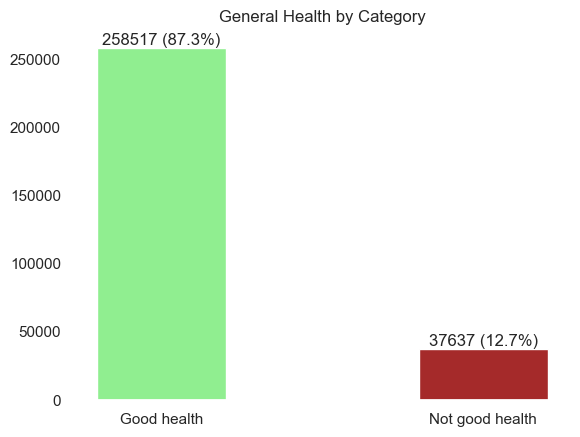

In [282]:
# Aggregate resp_count by gh_cat
gh_pr=[]
gh_pr = gh_processed_data.groupby('gh_desc')['resp_count'].sum().reset_index()
# Calculate percentage
total_responses = sum(gh_pr['resp_count'])
percentage = [(count / total_responses) * 100 for count in gh_pr['resp_count']]

# Create a bar plot
fig, ax = plt.subplots()
bar_color = ['lightgreen', 'brown']
bars = ax.bar(gh_pr['gh_desc'], gh_pr['resp_count'], width=0.4, color=bar_color)
ax.set_title("General Health by Category")

# Add resp_count and percentage on top of the bars
for bar, count, percent in zip(bars, gh_pr['resp_count'], percentage):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f"{count} ({percent:.1f}%)", ha='center', va='bottom')

ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
# Display the plot
# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

#remove background colour
ax.set_facecolor('none')

plt.show()

In [205]:
#Convert GH to 1- Good Health and 0 for Not good health
#gh_processed_data['gh_cat'] = gh_processed_data['gh_cat'].apply((lambda x: 0 if x == 1 else x))
gh_processed_data['gh_cat'] = gh_processed_data['gh_cat'].apply((lambda x: 0 if x == 2 else x))


In [206]:
gh_processed_data

,la_code,la_name,gh_cat,gh_desc,resp_count,combination,hrs_wrkd_cat_-8,hrs_wrkd_cat_1,hrs_wrkd_cat_2,trvlmode_cat_1,...,trvlmode_cat_12,nssec_cat_1,nssec_cat_2,nssec_cat_3,nssec_cat_4,nssec_cat_5,nssec_cat_6,nssec_cat_7,nssec_cat_8,nssec_cat_9
0,E09000027,Richmond upon Thames,1,Good health,3136,Part-time Higher manageWork mainl,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,E09000027,Richmond upon Thames,1,Good health,22464,Full-time Higher manageWork mainl,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2,E09000027,Richmond upon Thames,1,Good health,3598,Part-time Lower managerWork mainl,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,E09000027,Richmond upon Thames,1,Good health,12708,Full-time Lower managerWork mainl,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,E09000027,Richmond upon Thames,1,Good health,1222,Part-time Intermediate Work mainl,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,E09000030,Tower Hamlets,0,Not good health,1,Full-time Full-time stuOther meth,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
689,E09000027,Richmond upon Thames,1,Good health,5528,Does not Never worked Not in emp,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
690,E09000027,Richmond upon Thames,0,Not good health,3111,Does not Never worked Not in emp,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
691,E09000030,Tower Hamlets,1,Good health,19325,Does not Never worked Not in emp,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [207]:
#Repeating each row according to peoplecount
rows_list = []
gh_processed_data_fin1=[]

# Iterate through each row in the DataFrame
for index, row in gh_processed_data.iterrows():
    # Repeat the row according to the 'resp_count' value
    for _ in range(row['resp_count']):
        rows_list.append(row)

# Create a new DataFrame with the repeated rows
gh_processed_data_fin1 = pd.DataFrame(rows_list)

# Reset the index of the new DataFrame
gh_processed_data_fin1.reset_index(drop=True, inplace=True)


In [396]:
#shuffling the records - setting seed so that the order after shuffle remains same even though code is rerun
random.seed(2345)
gh_processed_data_fin=[]
gh_processed_data_fin=gh_processed_data_fin1.sample(n=len(gh_processed_data_fin1), random_state=42)

In [397]:
len(gh_processed_data_fin)

296154

In [398]:
gh_processed_data_fin.head(1)

,la_code,la_name,gh_cat,gh_desc,resp_count,combination,hrs_wrkd_cat_-8,hrs_wrkd_cat_1,hrs_wrkd_cat_2,trvlmode_cat_1,...,trvlmode_cat_12,nssec_cat_1,nssec_cat_2,nssec_cat_3,nssec_cat_4,nssec_cat_5,nssec_cat_6,nssec_cat_7,nssec_cat_8,nssec_cat_9
33523,E09000027,Richmond upon Thames,1,Good health,12708,Full-time Lower managerWork mainl,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [399]:
gh_processed_data_fin.columns

Index(['la_code', 'la_name', 'gh_cat', 'gh_desc', 'resp_count', 'combination',
       'hrs_wrkd_cat_-8', 'hrs_wrkd_cat_1', 'hrs_wrkd_cat_2', 'trvlmode_cat_1',
       'trvlmode_cat_2', 'trvlmode_cat_3', 'trvlmode_cat_4', 'trvlmode_cat_5',
       'trvlmode_cat_6', 'trvlmode_cat_7', 'trvlmode_cat_8', 'trvlmode_cat_9',
       'trvlmode_cat_10', 'trvlmode_cat_11', 'trvlmode_cat_12', 'nssec_cat_1',
       'nssec_cat_2', 'nssec_cat_3', 'nssec_cat_4', 'nssec_cat_5',
       'nssec_cat_6', 'nssec_cat_7', 'nssec_cat_8', 'nssec_cat_9'],
      dtype='object')

In [400]:
len(gh_clean_data_v2)

693

In [66]:
gh_clean_data_v2.head(5)

,la_code,la_name,gh_cat,gh_desc,trvlmode_cat,trvlmode_desc,nssec_cat,nssec_desc,hrs_wrkd_cat,hrs_wrkd_desc,resp_count,combination
0,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,1,"Higher managerial, administrative and profess...",1,Part-time: 30 hours or less worked,3136,Part-time Higher manageWork mainl
1,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,1,"Higher managerial, administrative and profess...",2,Full-time: 31 or more hours worked,22464,Full-time Higher manageWork mainl
2,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,2,"Lower managerial, administrative and professi...",1,Part-time: 30 hours or less worked,3598,Part-time Lower managerWork mainl
3,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,2,"Lower managerial, administrative and professi...",2,Full-time: 31 or more hours worked,12708,Full-time Lower managerWork mainl
4,E09000027,Richmond upon Thames,1,Good health,1,Work mainly at or from home,3,Intermediate occupations,1,Part-time: 30 hours or less worked,1222,Part-time Intermediate Work mainl


In [401]:
# Calculate the strength of relationship between feature and class variable.
warnings.filterwarnings("ignore")
data=[]
cd=['la_code','la_name','resp_count','gh_desc','hrs_wrkd_cat_-8','combination','trvlmode_cat_12']
data = gh_processed_data_fin.drop(cd, axis=1)
cramer_df_all = pd.DataFrame(columns=['Feature','CramersV', 'Chi-Squared', 'p-value'])
# Iterate through each categorical feature
for feature in data.columns:
    if feature != 'gh_cat':  # Exclude the class variable itself
        crosstab = pd.crosstab(data[feature], data['gh_cat'])
        chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
        #print(f"{feature} chi-squared: {chi2:.3f} (p-value: {p_value:.3f})")
        #results_df = results_df.append({'Feature': feature, 'Chi-Squared': round(chi2,2), 'p-value': round(p_value,2)}, ignore_index=True)
        # Number of observations
        n = crosstab.sum().sum()

        # Number of categories in the first variable
        k = crosstab.shape[0]

        # Number of categories in the second variable
        r = crosstab.shape[1]

        # Calculate Cramer's V
        cramers_v = round(np.sqrt(chi2 / (n * min(k-1, r-1))),2)

        #print(f"Cramer's V value: {cramers_v}")
        #print(crosstab)
        cramer_df_all = cramer_df_all.append({'Feature': feature,'CramersV':cramers_v, 'Chi-Squared':round(chi2,2),'expected':expected, 'p-value': round(p_value,2)}, ignore_index=True)


In [403]:
# Chi square value cramers V value and p value
cramer_df_all.sort_values(by='Chi-Squared',ascending=False)
#.to_clipboard(index=False, sep='\t')

,Feature,CramersV,Chi-Squared,p-value,expected
20,nssec_cat_8,0.37,40431.35,0.00,"[[32145.490829095674, 220797.50917090432], [54..."
1,hrs_wrkd_cat_2,0.26,20552.36,0.00,"[[13967.122547728546, 95935.87745227145], [236..."
2,trvlmode_cat_1,0.19,10674.20,0.00,"[[20411.77602868778, 140202.22397131223], [172..."
13,nssec_cat_1,0.15,6280.40,0.00,"[[27070.69635054735, 185940.30364945266], [105..."
14,nssec_cat_2,0.11,3355.49,0.00,"[[28629.659184073153, 196648.34081592684], [90..."
10,trvlmode_cat_9,0.05,665.58,0.00,"[[36227.744366106825, 248837.2556338932], [140..."
3,trvlmode_cat_2,0.04,527.54,0.00,"[[34542.96648365378, 237265.03351634622], [309..."
21,nssec_cat_9,0.04,399.13,0.00,"[[36533.640146680445, 250938.35985331956], [11..."
15,nssec_cat_3,0.03,219.95,0.00,"[[34698.26546323872, 238331.73453676127], [293..."
16,nssec_cat_4,0.03,208.26,0.00,"[[34238.84990579226, 235176.15009420775], [339..."


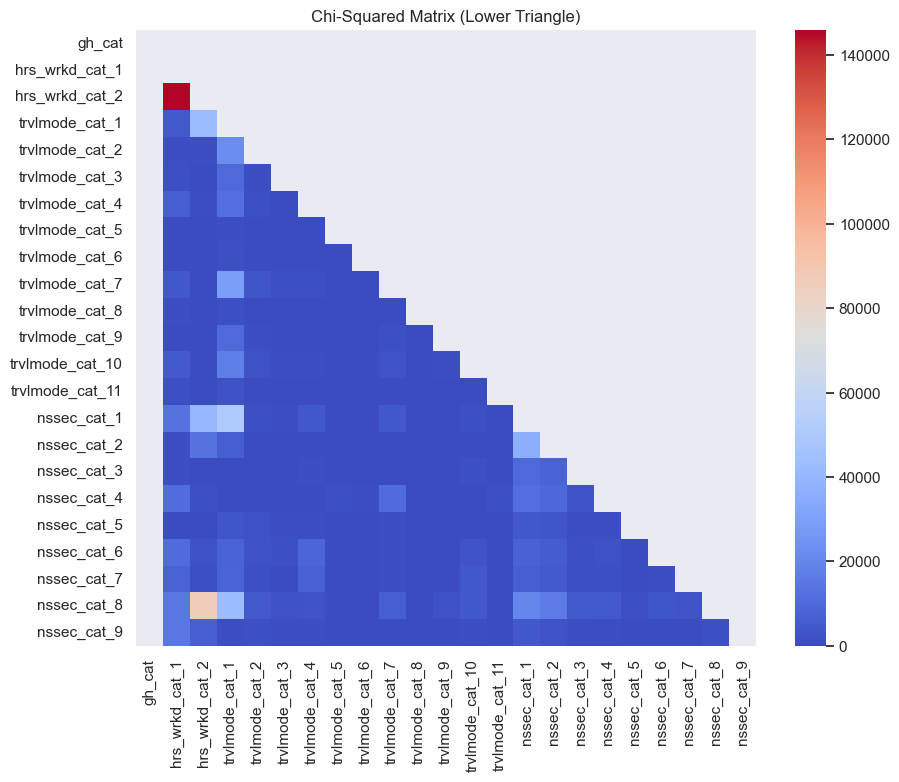

In [404]:
# Create an empty DataFrame to store the chi-squared values
chi2_matrix = pd.DataFrame(index=data.columns, columns=data.columns)

# Iterate through pairs of different categorical features
for feature1 in data.columns:
    if feature1 != 'gh_cat':
        for feature2 in data.columns:
            if feature2 != 'gh_cat' and feature2 != feature1:
                crosstab = pd.crosstab(data[feature1], data[feature2])
                chi2, _, _, _ = stats.chi2_contingency(crosstab)
                chi2_matrix.loc[feature1, feature2] = round(chi2,1)

# Create a mask for the upper triangle
mask = np.triu(np.ones(chi2_matrix.shape), k=1)

# Plot a heatmap of the chi-squared values (lower triangle)
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_matrix.astype(float), annot=False, cmap='coolwarm', fmt=".1f", mask=mask)
plt.title("Chi-Squared Matrix (Lower Triangle)")
plt.show()

In [405]:
#Remove least significant features trvlmode_cat_5 and nssec_cat_6
drop_var=['trvlmode_cat_5','nssec_cat_6']
data = data.drop(drop_var, axis=1)

In [285]:
#Perform undersampling on the whole dataset --trial  ignore
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampleda, y_resampleda = undersampler.fit_resample(data.drop('gh_cat', axis=1), data['gh_cat'])
#Split dataset to train 60%, test 20% and validation 20% sets
X_train, X_test1, y_train, y_test1 = train_test_split(
    X_resampleda, y_resampleda, test_size=0.4, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(
    X_test1, y_test1, test_size=0.5, random_state=42)

In [545]:
#Perform undersampling on training dataset
# Data set is imbalanced so intitally divided into 80 training  :20 test
X_train, X_test1, y_train, y_test1 = train_test_split(
    data.drop('gh_cat', axis=1), data['gh_cat'], test_size=0.2, random_state=42)

#The test data is further divided into test and validation
X_test, X_val, y_test, y_val = train_test_split(
    X_test1, y_test1, test_size=0.2, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(
    #data.drop('gh_cat', axis=1), data['gh_cat'], test_size=0.2, random_state=42)

# Use RandomUnderSampler to perform undersampling
#undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

#undersampler = CondensedNearestNeighbour(n_neighbors=1, random_state=42)

#The training data is undersampled and hence count will be reduced
undersampler = NearMiss(version=1, n_neighbors=3)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [571]:
len(X_train), len(X_test1), len(X_resampled),len(X_test),len(X_val)

(236923, 59231, 60160, 47384, 11847)

In [407]:
data

,gh_cat,hrs_wrkd_cat_1,hrs_wrkd_cat_2,trvlmode_cat_1,trvlmode_cat_2,trvlmode_cat_3,trvlmode_cat_4,trvlmode_cat_6,trvlmode_cat_7,trvlmode_cat_8,...,trvlmode_cat_10,trvlmode_cat_11,nssec_cat_1,nssec_cat_2,nssec_cat_3,nssec_cat_4,nssec_cat_5,nssec_cat_7,nssec_cat_8,nssec_cat_9
33523,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10320,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
113908,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
254056,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
275482,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
259178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
131932,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
146867,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [577]:
#Train and test each algorithm on training data 
#Check the report and confusion matrix
models = []
models.append(('NB',BernoulliNB()))
models.append(('LogR',LogisticRegression(C= 100,penalty='l2', solver= 'newton-cg')))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(bootstrap=True, max_features='sqrt', n_estimators=50, max_depth=None,min_samples_split=5, random_state=7)))

#X_resampled, y_resampled
#X_best_features_train =X_test
#y_train =y_test
#x_tr=X_train
#y_tr=y_train

x_tr=X_resampled
y_tr=y_resampled
#x_te=X_resampled
x_te = X_test
y_te = y_test

#x_te = X_val
#y_te = y_val
#X_best_features_train =X_train
results = []
names = []
def calculate_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

for name, model in models:
    #stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    # Fit the best_model on your training data
    y_pr=[]
    ml_model=model.fit(x_tr, y_tr)
    y_pr=ml_model.predict(x_te)
    y_prob=ml_model.predict_proba(x_te)[:,1]
    # Perform cross-validation and get predicted labels
    #y_pred = cross_val_predict(model, X_best_features_train, y_train, cv=stratified_kfold)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_te, y_pr)
    f1 = f1_score(y_te, y_pr)
    recall = recall_score(y_te, y_pr)
    precision = precision_score(y_te, y_pr)
    conf_matrix = confusion_matrix(y_te, y_pr)
    report = classification_report(y_te, y_pr)
    #miss_rate = 1-recall
    rocauc = roc_auc_score(y_te,y_prob)
   
    # Find Specificity
    specificity = calculate_specificity(y_te, y_pr)
    #print("Specificity:", specificity)

    #Find MSE bias and variance using ML extend library - code refered from Brownlee
    #mse, bias, var = bias_variance_decomp(ml_model, x_tr.values, y_tr.values, x_te.values, y_te.values, loss='mse', num_rounds=200, random_seed=1)
    #print('MSE: %.3f' % mse)
    #print('Bias: %.3f' % bias)
    #print('Variance: %.3f' % var)
    
    #Calculate log loss
    probs=ml_model.predict_proba(x_te)
    loss = log_loss(y_te, probs)
    #print('log loss:',loss)

    #results.append((f1))
    names.append(name)
    
    # Print the evaluation metrics
    print("%s: Accuracy=%.3f, Recall=%.3f, Precision=%.3f, F1=%.3f,RoC-AUC=%.3f,Specificity=%.3f,log-loss=%.3f" % (name, accuracy,  recall, precision,f1,rocauc,specificity,loss))
    print(name)
    print(report)
    print("Confusion Matrix:\n", conf_matrix)
    #print("MissRate",round(miss_rate,3))
    print()

NB: Accuracy=0.775, Recall=0.798, Precision=0.935, F1=0.861,RoC-AUC=0.761,Specificity=0.620,log-loss=0.625
NB
              precision    recall  f1-score   support

           0       0.31      0.62      0.41      6072
           1       0.93      0.80      0.86     41312

    accuracy                           0.78     47384
   macro avg       0.62      0.71      0.64     47384
weighted avg       0.85      0.78      0.80     47384

Confusion Matrix:
 [[ 3766  2306]
 [ 8333 32979]]

LogR: Accuracy=0.777, Recall=0.799, Precision=0.935, F1=0.862,RoC-AUC=0.764,Specificity=0.624,log-loss=0.564
LogR
              precision    recall  f1-score   support

           0       0.31      0.62      0.42      6072
           1       0.94      0.80      0.86     41312

    accuracy                           0.78     47384
   macro avg       0.62      0.71      0.64     47384
weighted avg       0.86      0.78      0.81     47384

Confusion Matrix:
 [[ 3791  2281]
 [ 8288 33024]]

DT: Accuracy=0.777, 

In [308]:
#hyperparameter tuning code taken from brownlee...

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X = X_resampled
y = y_resampled
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.711874 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.711874 (0.004683) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.711874 (0.004683) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.711874 (0.004683) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.711874 (0.004683) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.711874 (0.004683) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.711874 (0.004683) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.711863 (0.004700) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.711863 (0.004700) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.711857 (0.004705) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.711580 (0.004743) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.711586 (0.004743) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.711558 (0.004754) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.710910 (0.005223) wit

In [411]:
#Trial -ignore
regressor_OLS = sm.Logit(y_resampled,X_resampled).fit(maxiter=1000) 
regressor_OLS.summary()
#regressor_OLS.aic

Optimization terminated successfully.
         Current function value: 0.573362
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 gh_cat   No. Observations:                60160
Model:                          Logit   Df Residuals:                    60140
Method:                           MLE   Df Model:                           19
Date:                Sat, 30 Dec 2023   Pseudo R-squ.:                  0.1728
Time:                        17:09:19   Log-Likelihood:                -34493.
converged:                       True   LL-Null:                       -41700.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
hrs_wrkd_cat_1     -0.5114      0.138     -3.696      0.000      -0.783      -0.240
hrs_wrkd_cat_2      0.0413      0.139      0.298      0.766      -0.230       0.313
trvlmode_cat_1      0.4884      0.135      3.611      0.000       0.223       0.754
trvlmode_cat_2      0.3781      0.138      2.738      0.006       0.107       0.649
trvlmode_cat_3      0.3983      0.142      2.803      0.005       0.120       0.677
trvlmode_cat_4     -0.0970      0.140     -0.692      0.489      -0.372       0.178
trvlmode_cat_6      0.4562      0.195      2.340      0.019       0.074       0.838
trvlmode_cat_7      0.1787      0.136      1.309      0.190      -0.089       0.446
trvlmode_cat_8     -0.1141      0.167     -0.683      0.494      -0.442       0.213
trvlmode_cat_9      0.9031      0.146      6.191      0.000       0.617       1.189
trvlmode_cat_10     0.2704      0.139      1.950      0.051      -0.001       0.542
trvlmode_cat_11    -0.3101      0.160     -1.941      0.052      -0.623       0.003
nssec_cat_1         0.5800      0.044     13.213      0.000       0.494       0.666
nssec_cat_2         0.4576      0.042     10.925      0.000       0.376       0.540
nssec_cat_3         0.1454      0.047      3.078      0.002       0.053       0.238
nssec_cat_4         0.2199      0.046      4.754      0.000       0.129       0.310
nssec_cat_5         0.0139      0.060      0.233      0.816      -0.103       0.131
nssec_cat_7        -0.0346      0.050     -0.690      0.490      -0.133       0.064
nssec_cat_8        -1.6203      0.020    -79.728      0.000      -1.660      -1.581
nssec_cat_9         0.9438      0.070     13.518      0.000       0.807       1.081
===================================================================================
"""

In [551]:
#Final model
regressor_LR = LogisticRegression(C= 100,penalty='l2', solver= 'newton-cg',random_state=42)
regressor_LR.fit(X_resampled,y_resampled)
coefficients = regressor_LR.coef_[0]
intercept = regressor_LR.intercept_
feature_coefficients = list(zip(X_resampled.columns, coefficients))
for feature, coefficient in feature_coefficients:
    print(f"{feature}: {coefficient}",np.exp(coefficient))
print(intercept)

hrs_wrkd_cat_1: 0.1854734251009878 1.203788208799977
hrs_wrkd_cat_2: 0.7382546052222607 2.0922804702683346
trvlmode_cat_1: 0.4881572003925751 1.629310958164143
trvlmode_cat_2: 0.37778683634177157 1.4590518928856648
trvlmode_cat_3: 0.3979994433395705 1.4888432011269512
trvlmode_cat_4: -0.09726471418954317 0.9073157949756977
trvlmode_cat_6: 0.4558494554512088 1.5775128409306223
trvlmode_cat_7: 0.178374152002178 1.1952724511630566
trvlmode_cat_8: -0.11441402477921749 0.891888615442542
trvlmode_cat_9: 0.9027324343129755 2.4663330054039316
trvlmode_cat_10: 0.27013108067506864 1.3101361730122556
trvlmode_cat_11: -0.3103574810290323 0.733184809710632
nssec_cat_1: 0.5800006689726112 1.7860396255612656
nssec_cat_2: 0.4576082872044092 1.5802898620469015
nssec_cat_3: 0.14540307438587538 1.1565056341307476
nssec_cat_4: 0.21983640078251013 1.2458728900838525
nssec_cat_5: 0.013873910165834643 1.013970599493035
nssec_cat_7: -0.034624980890136076 0.9659676046507908
nssec_cat_8: -0.9237281094462603 0.3

In [552]:
coeff_df=[]
coeff_df = pd.DataFrame(feature_coefficients, columns=['Feature', 'Coefficients'])
coeff_df = coeff_df.sort_values(by='Coefficients', ascending=False)

In [553]:
coeff_df

,Feature,Coefficients
19,nssec_cat_9,0.943731
9,trvlmode_cat_9,0.902732
1,hrs_wrkd_cat_2,0.738255
12,nssec_cat_1,0.580001
2,trvlmode_cat_1,0.488157
13,nssec_cat_2,0.457608
6,trvlmode_cat_6,0.455849
4,trvlmode_cat_3,0.397999
3,trvlmode_cat_2,0.377787
10,trvlmode_cat_10,0.270131


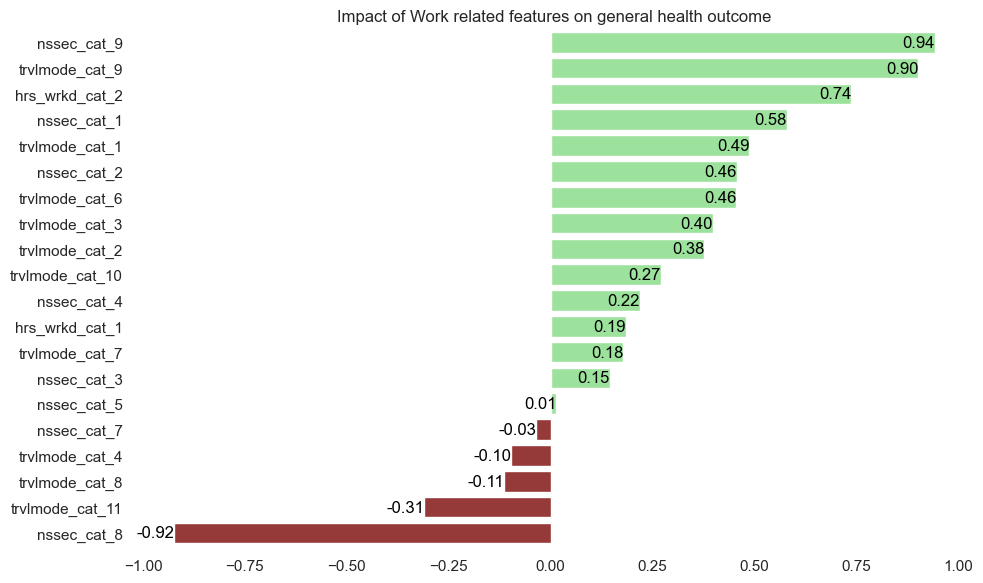

In [554]:


# Create a horizontal bar chart using seaborn
plt.figure(figsize=(10, 6))

# Set the color palette
palette = ['lightgreen' if x >= 0 else 'brown' for x in coeff_df['Coefficients']]
ax = sns.barplot(x='Coefficients', y='Feature', data=coeff_df,
                 palette=palette)  # Use a single color for 'Good health'

# Annotate each bar with its coefficient
for index, value in enumerate(coeff_df['Coefficients']):
    ax.text(value, index, f'{value:.2f}', ha='right', va='center', color='black')

# Set labels and title
# plt.xlabel('coefficients')

plt.xlabel('')
plt.ylabel('')
plt.title('Impact of Work related features on general health outcome')

# Turn off grid lines
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Remove background color
ax.set_facecolor('none')

# Display the plot
plt.tight_layout()
plt.show()

In [388]:
#Create a dataframe to store different input scenarios
prob_scenarios_df=[]
prob_scenarios_df=pd.DataFrame(columns=X_test.columns)
prob_scenarios_df['Scenario'] = 0

In [389]:
#Insert the values for various combinations of work variables to the input dataframe
values=[[0,0,0,	0,0,0,0,0,0	,0	,0,	0,	0	,0	,0,	0,	0,	0,	1,	0,'Never Worked'],
        [0,1,0,	0,0,0,0,1,0	,0	,0,	0,	1	,0	,0,	0,	0,	0,	0,	0,'FT-HigherManagerialDrivingCar'],
        [0,1,0,	0,0,0,0,0,0	,1	,0,	0,	1	,0	,0,	0,	0,	0,	0,	0,'FT-HigherManagerialBicycle'],
        [1,0,0,	0,0,0,0,0,0	,1	,0,	0,	0	,0	,0,	0,	0,	1,	0,	0,'PT-RoutineOccuBicycle'],
        [1,0,0,	0,0,0,0,0,1	,0	,0,	0,	0	,0	,0,	0,	0,	1,	0,	0,'PT-RoutineOccuPassengerinCar'],
        [0,1,0,	0,0,0,0,1,0	,0	,0,	0,	0	,0	,1,	0,	0,	0,	0,	0,'FT-IntermediateOccuDrivingcar'],
        [1,0,0,	0,0,0,0,1,0	,0	,0,	0,	0	,0	,1,	0,	0,	0,	0,	0,'PT-IntermediateOccuDrivingcar'],
        [1,0,0,	0,0,0,0,1,0	,0	,0,	0,	0	,0	,0,	0,	1,	0,	0,	0,'PT-LowersupervisorDrivingcar'],
        [1,0,0,	0,0,1,0,0,0	,0	,0,	0,	0	,0	,0,	0,	0,	1,	0,	0,'PT-RoutineOccuBus,Minibus'],
        [1,0,0,	0,1,0,0,0,0	,0	,0,	0,	0	,0	,0,	0,	0,	1,	0,	0,'PT-RoutineOccuTrain'],
        [1,0,0,	0,0,0,0,1,0	,0	,0,	0,	0	,0	,0,	0,	0,	1,	0,	0,'PT-RoutineOccuDrivingcar'],
        ]

prob_scenarios_df = prob_scenarios_df.append(pd.DataFrame(values, columns=prob_scenarios_df.columns), ignore_index=True)


In [573]:
prob_scenarios_df.head(2)

,hrs_wrkd_cat_1,hrs_wrkd_cat_2,trvlmode_cat_1,trvlmode_cat_2,trvlmode_cat_3,trvlmode_cat_4,trvlmode_cat_6,trvlmode_cat_7,trvlmode_cat_8,trvlmode_cat_9,...,trvlmode_cat_11,nssec_cat_1,nssec_cat_2,nssec_cat_3,nssec_cat_4,nssec_cat_5,nssec_cat_7,nssec_cat_8,nssec_cat_9,Scenario
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Never Worked
1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,FT-HigherManagerialDrivingCar


In [391]:
d=['Scenario']
prob_scenarios_df1=prob_scenarios_df.drop(d, axis=1)

In [392]:
y_prob = regressor_LR.predict_proba(prob_scenarios_df1)
y_prob

array([[0.834842  , 0.165158  ],
       [0.31002175, 0.68997825],
       [0.17881805, 0.82118195],
       [0.41169347, 0.58830653],
       [0.65930024, 0.34069976],
       [0.40964817, 0.59035183],
       [0.54670375, 0.45329625],
       [0.57905379, 0.42094621],
       [0.65543764, 0.34456236],
       [0.53687391, 0.46312609],
       [0.59082797, 0.40917203]])

In [381]:
prob_scenarios_df

,hrs_wrkd_cat_1,hrs_wrkd_cat_2,trvlmode_cat_1,trvlmode_cat_2,trvlmode_cat_3,trvlmode_cat_4,trvlmode_cat_6,trvlmode_cat_7,trvlmode_cat_8,trvlmode_cat_9,...,trvlmode_cat_11,nssec_cat_1,nssec_cat_2,nssec_cat_3,nssec_cat_4,nssec_cat_5,nssec_cat_7,nssec_cat_8,nssec_cat_9,Scenario
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Never Worked
1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,FT-HigherManagerialDrivingCar
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,FT-HigherManagerialBicycle
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,PT-RoutineOccuBicycle
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,PT-RoutineOccuPassengerinCar
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,FT-IntermediateOccuDrivingcar


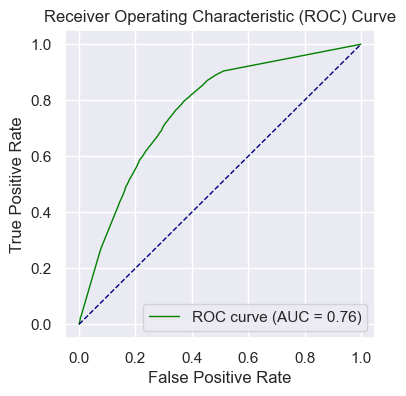

In [570]:
#plot roc curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
# Predict the probabilities for the positive class
y_probs = regressor_LR.predict_proba(x_te)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_te, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='green', lw=1, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

In [223]:
#Feature selection - trial code stepwise aic - ignore 

import statsmodels.api as sm
xaic=data.drop('gh_cat', axis=1)
yaic=data['gh_cat']

# Stepwise variable selection using AIC
def stepwise_selection(xaic, yaic, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(xaic.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(yaic, sm.add_constant(pd.DataFrame(xaic[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval}')
        
        # Backward step
        model = sm.OLS(yaic, sm.add_constant(pd.DataFrame(xaic[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval}')
        
        if not changed:
            break
    
    return included

result = stepwise_selection(xaic, yaic)

# Print the selected features
print("Selected features:", result)


Add  nssec_cat_1 with p-value 0.0
Add  trvlmode_cat_1 with p-value 0.0
Add  trvlmode_cat_7 with p-value 0.0
Add  trvlmode_cat_2 with p-value 0.0
Add  trvlmode_cat_10 with p-value 0.0
Add  nssec_cat_2 with p-value 0.0
Add  trvlmode_cat_4 with p-value 0.0
Add  trvlmode_cat_9 with p-value 0.0
Add  hrs_wrkd_cat_2 with p-value 0.0
Add  hrs_wrkd_cat_1 with p-value 0.0
Drop trvlmode_cat_7 with p-value 0.2308049848750462
Add  nssec_cat_9 with p-value 2.3269221256400286e-89
Add  nssec_cat_4 with p-value 5.491274578232116e-15
Add  trvlmode_cat_11 with p-value 2.4432704624163605e-15
Add  nssec_cat_3 with p-value 9.897372097183892e-15
Add  trvlmode_cat_3 with p-value 2.299460232490761e-10
Add  trvlmode_cat_8 with p-value 2.3562726786609432e-07
Add  trvlmode_cat_6 with p-value 0.0015858573814494688
Selected features: ['nssec_cat_1', 'trvlmode_cat_1', 'trvlmode_cat_2', 'trvlmode_cat_10', 'nssec_cat_2', 'trvlmode_cat_4', 'trvlmode_cat_9', 'hrs_wrkd_cat_2', 'hrs_wrkd_cat_1', 'nssec_cat_9', 'nssec_cat_

In [243]:
#Perform undersampling to avoid imbalance
X_train, X_test, y_train, y_test = train_test_split(
    data[result], data['gh_cat'], test_size=0.2, random_state=42)
# Use RandomUnderSampler to perform undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)